# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2021
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 8 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook (colab):

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

## Важно

Перед отправкой проверьте, что весь ваш код выполняется без ошибок, если во время проверки после последовательного перезапуска ячеек что-то пойдет не так, то задание может быть оценено в 0 баллов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.4)
%matplotlib inline
%config InlineBackend.figure_format="retina"  # only for retina display

Зафиксируем `seed` для воспроизводимости.

In [2]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [3]:
N = int(1e4)  # use this
tetta = 10
samples = sps.uniform(loc=0, scale=tetta).rvs(N)

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [4]:
mean = np.cumsum(samples)/np.arange(1, N+1)
x_1 = np.minimum.accumulate(samples)
x_n = np.maximum.accumulate(samples)

est_1 = 2*mean
est_2 = mean + x_n/2
est_3 = x_1*np.arange(2, N+2)
est_4 = x_1 + x_n
est_5 = x_n*np.arange(2, N+2)/np.arange(1, N+1)

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки лучше соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

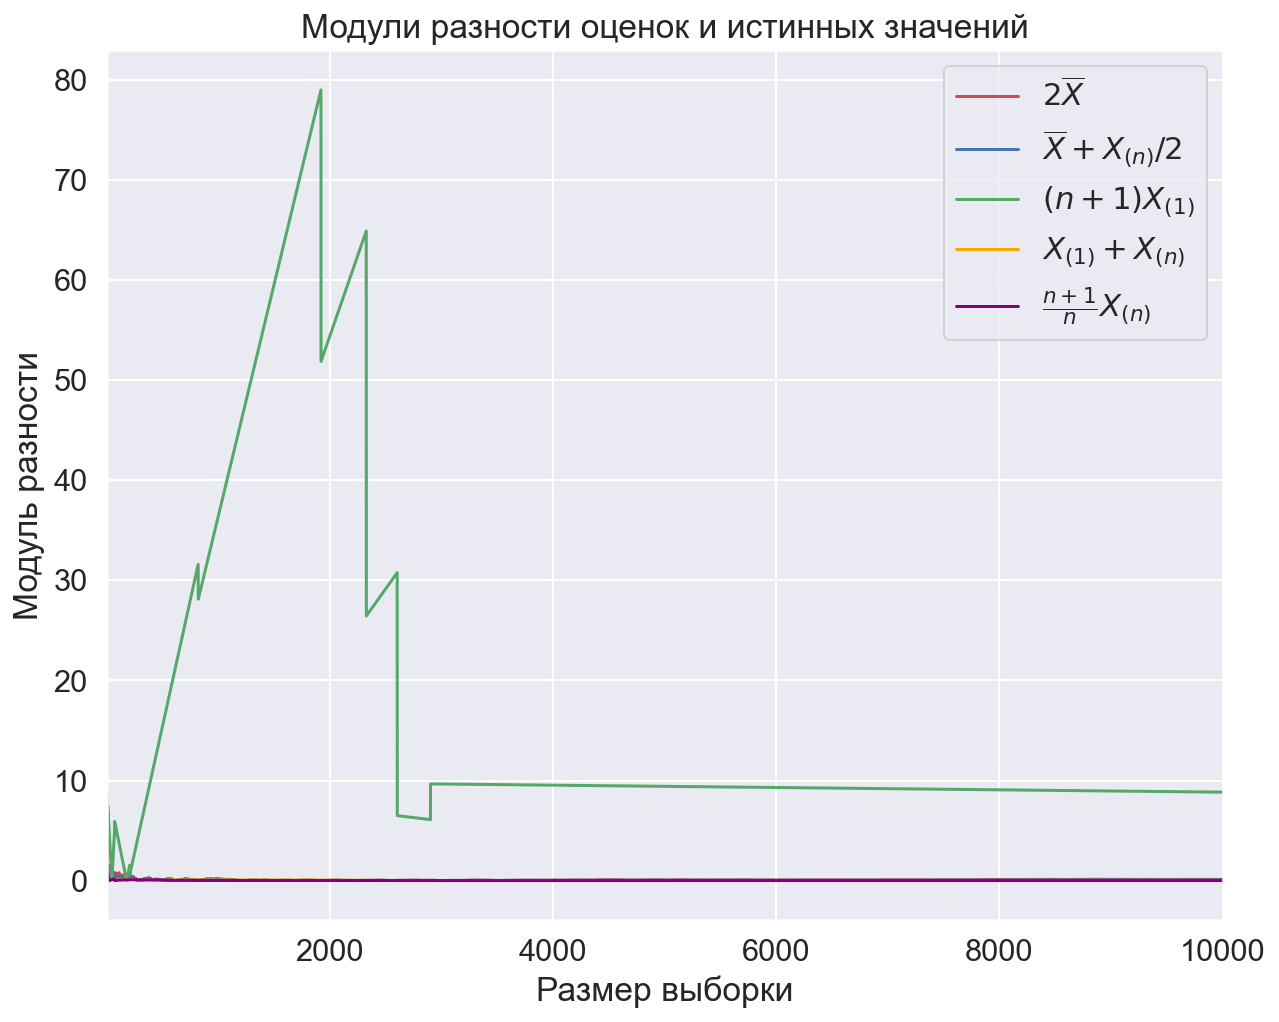

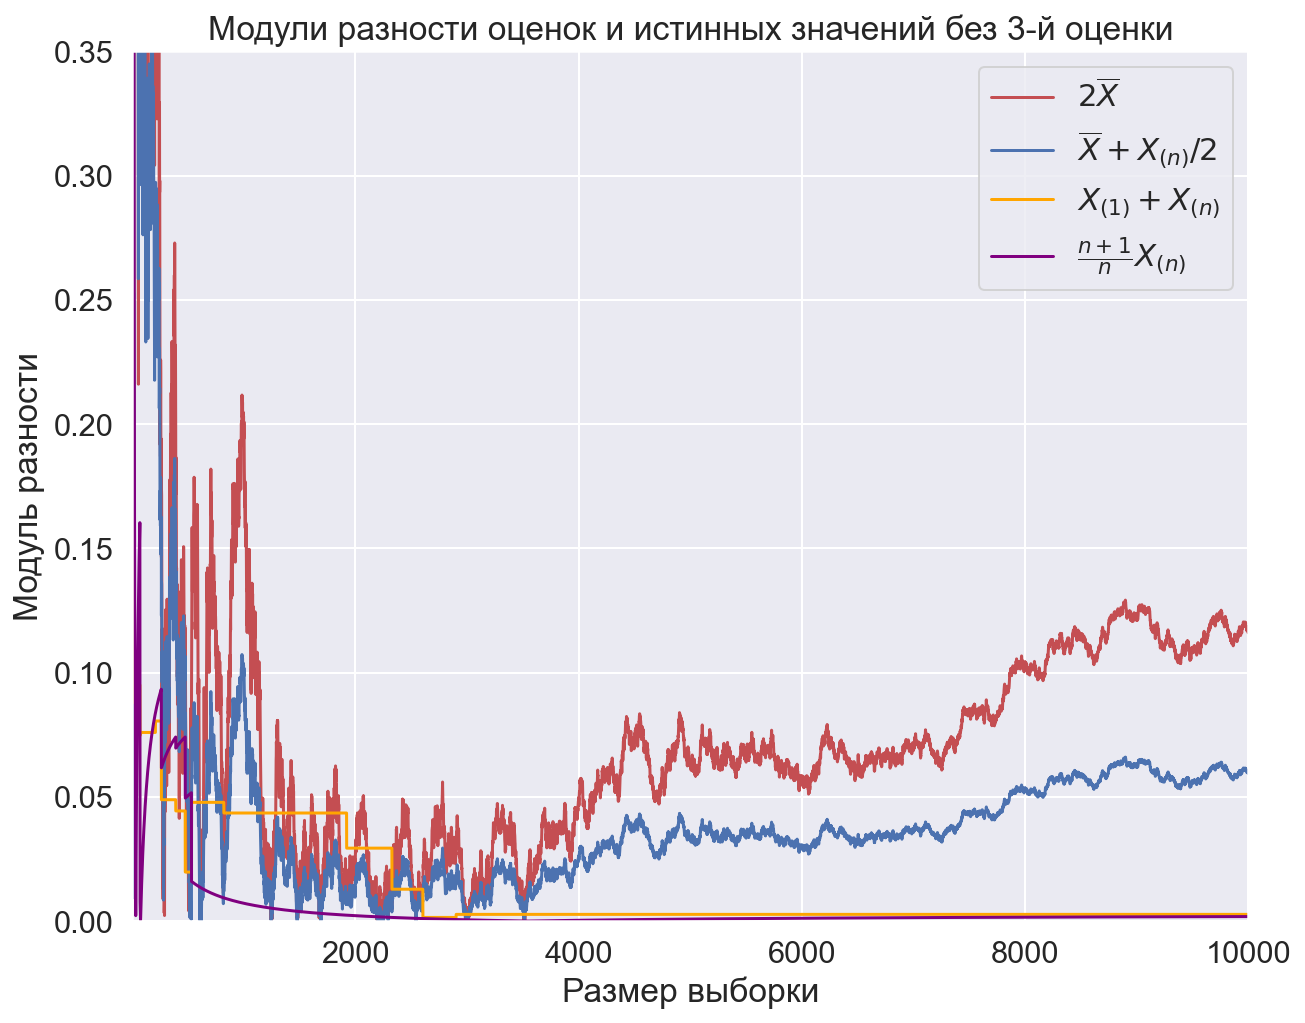

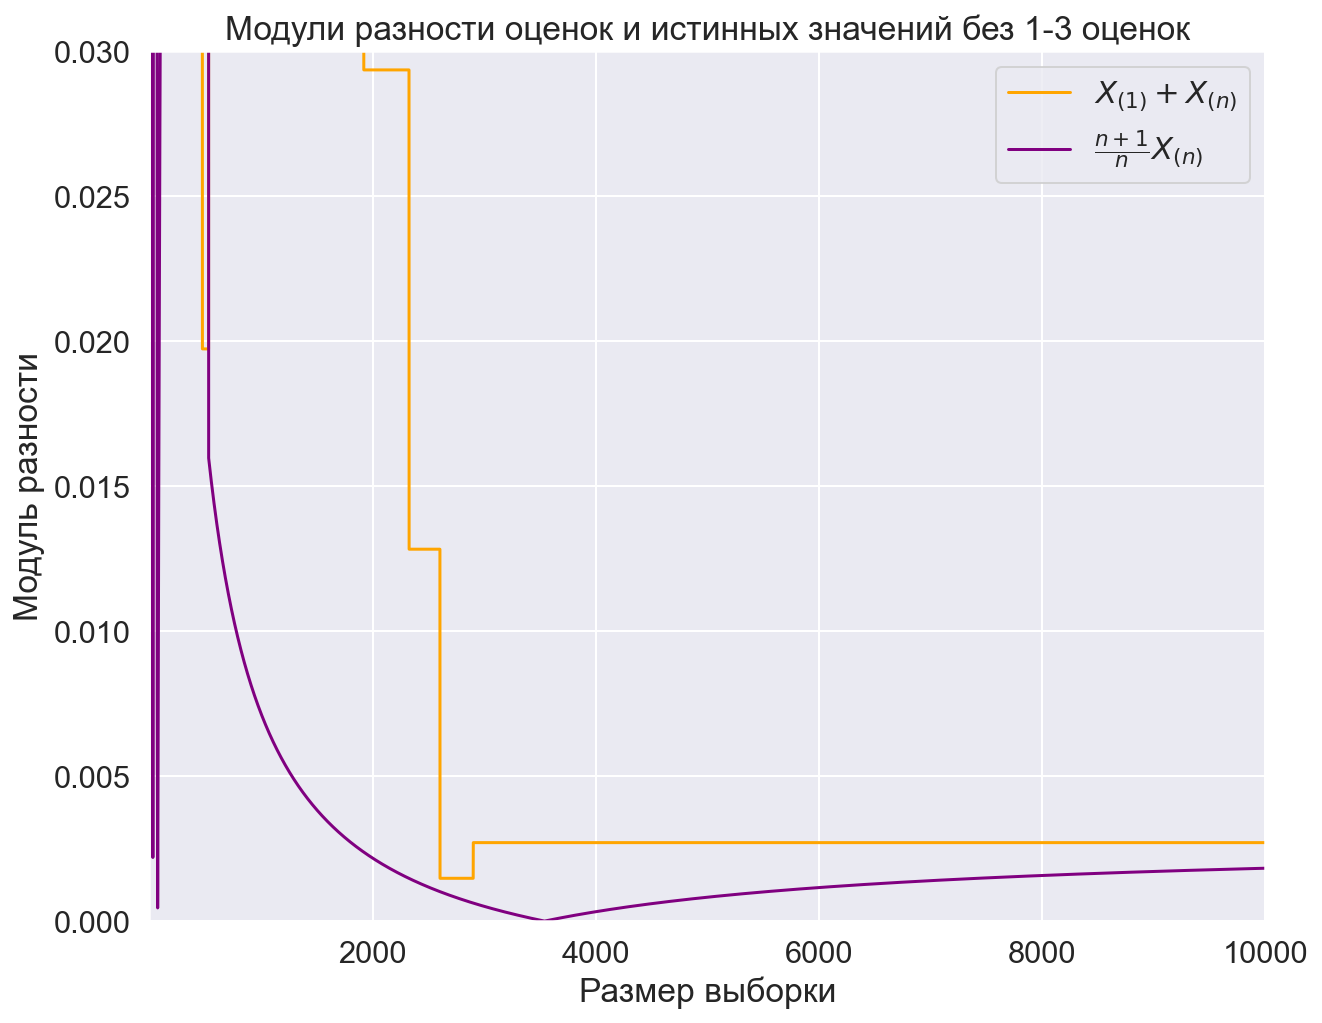

In [5]:
plt.figure(figsize=(10,8))
plt.title("Модули разности оценок и истинных значений")

plt.plot(np.arange(1, N+1), np.abs(est_1 - tetta), label = r"$2\overline{X}$", color='r')
plt.plot(np.arange(1, N+1), np.abs(est_2 - tetta), label = r"$\overline{X} + X_{(n)}/ 2$", color='b')
plt.plot(np.arange(1, N+1), np.abs(est_3 - tetta), label = r"$(n+1)X_{(1)}$", color='g')
plt.plot(np.arange(1, N+1), np.abs(est_4 - tetta), label = r"$X_{(1)}+X_{(n)}$", color='orange')
plt.plot(np.arange(1, N+1), np.abs(est_5 - tetta), label = r"$\frac{n+1}{n} X_{(n)}$", color='purple')

plt.xlim(1, N)
plt.legend()
plt.xlabel("Размер выборки")
plt.ylabel("Модуль разности")
plt.show()


plt.figure(figsize=(10,8))
plt.title("Модули разности оценок и истинных значений без 3-й оценки")

plt.plot(np.arange(1, N+1), np.abs(est_1 - tetta), label = r"$2\overline{X}$", color='r')
plt.plot(np.arange(1, N+1), np.abs(est_2 - tetta), label = r"$\overline{X} + X_{(n)}/ 2$", color='b')
plt.plot(np.arange(1, N+1), np.abs(est_4 - tetta), label = r"$X_{(1)}+X_{(n)}$", color='orange')
plt.plot(np.arange(1, N+1), np.abs(est_5 - tetta), label = r"$\frac{n+1}{n} X_{(n)}$", color='purple')

plt.xlim(1, N)
plt.ylim(0, 0.35)
plt.legend()
plt.xlabel("Размер выборки")
plt.ylabel("Модуль разности")
plt.show()


plt.figure(figsize=(10,8))
plt.title("Модули разности оценок и истинных значений без 1-3 оценок")

plt.plot(np.arange(1, N+1), np.abs(est_4 - tetta), label = r"$X_{(1)}+X_{(n)}$", color='orange')
plt.plot(np.arange(1, N+1), np.abs(est_5 - tetta), label = r"$\frac{n+1}{n} X_{(n)}$", color='purple')

plt.xlim(1, N)
plt.ylim(0, 0.03)
plt.legend()
plt.xlabel("Размер выборки")
plt.ylabel("Модуль разности")
plt.show()

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__ лучшая оценка $\frac{n+1}{n} X_{(n)}$



Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

Tetta =  0.5


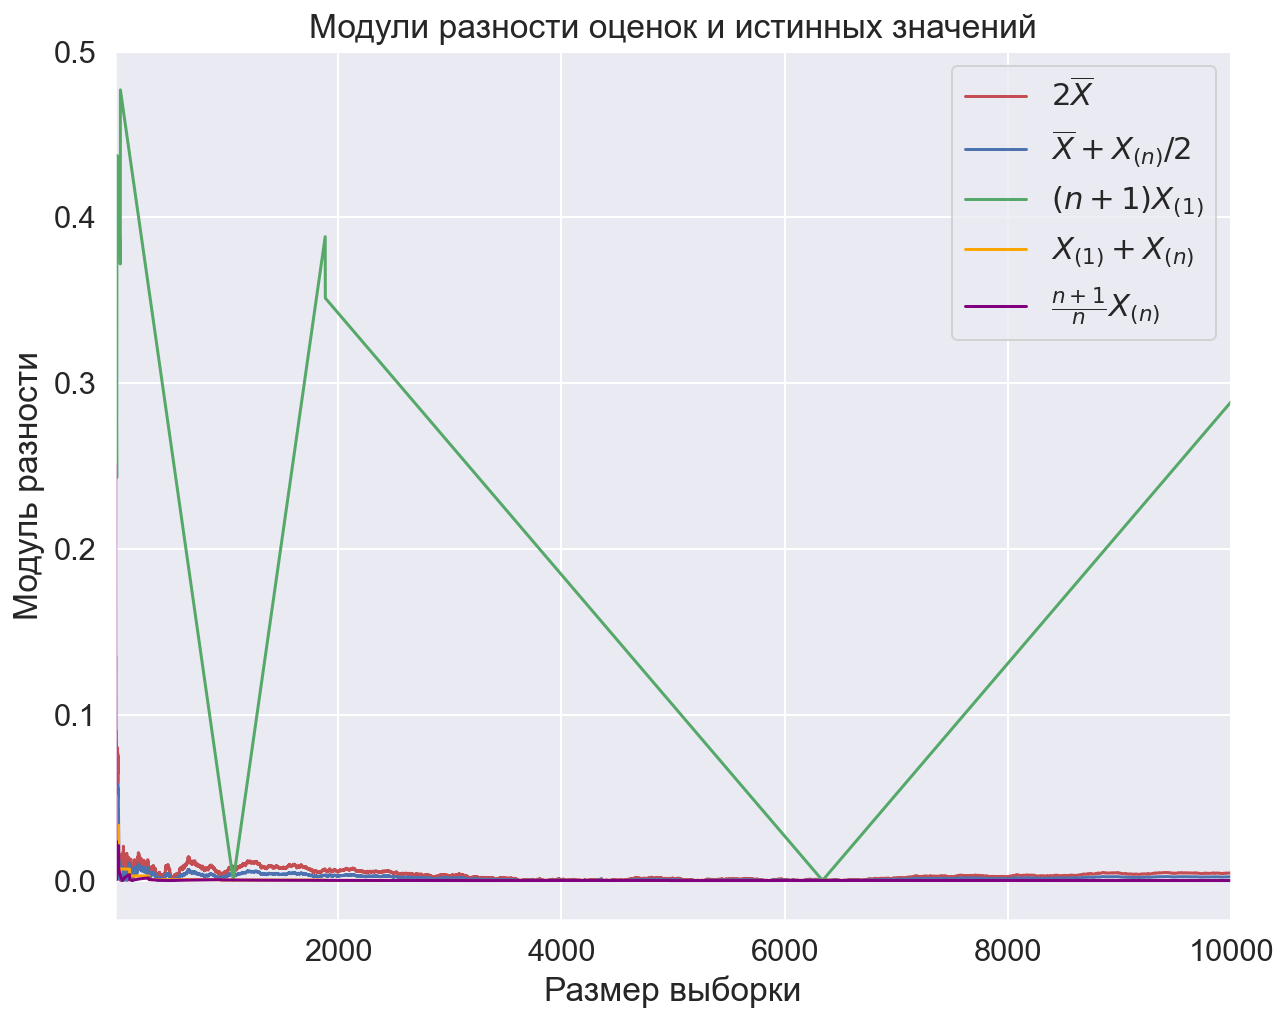

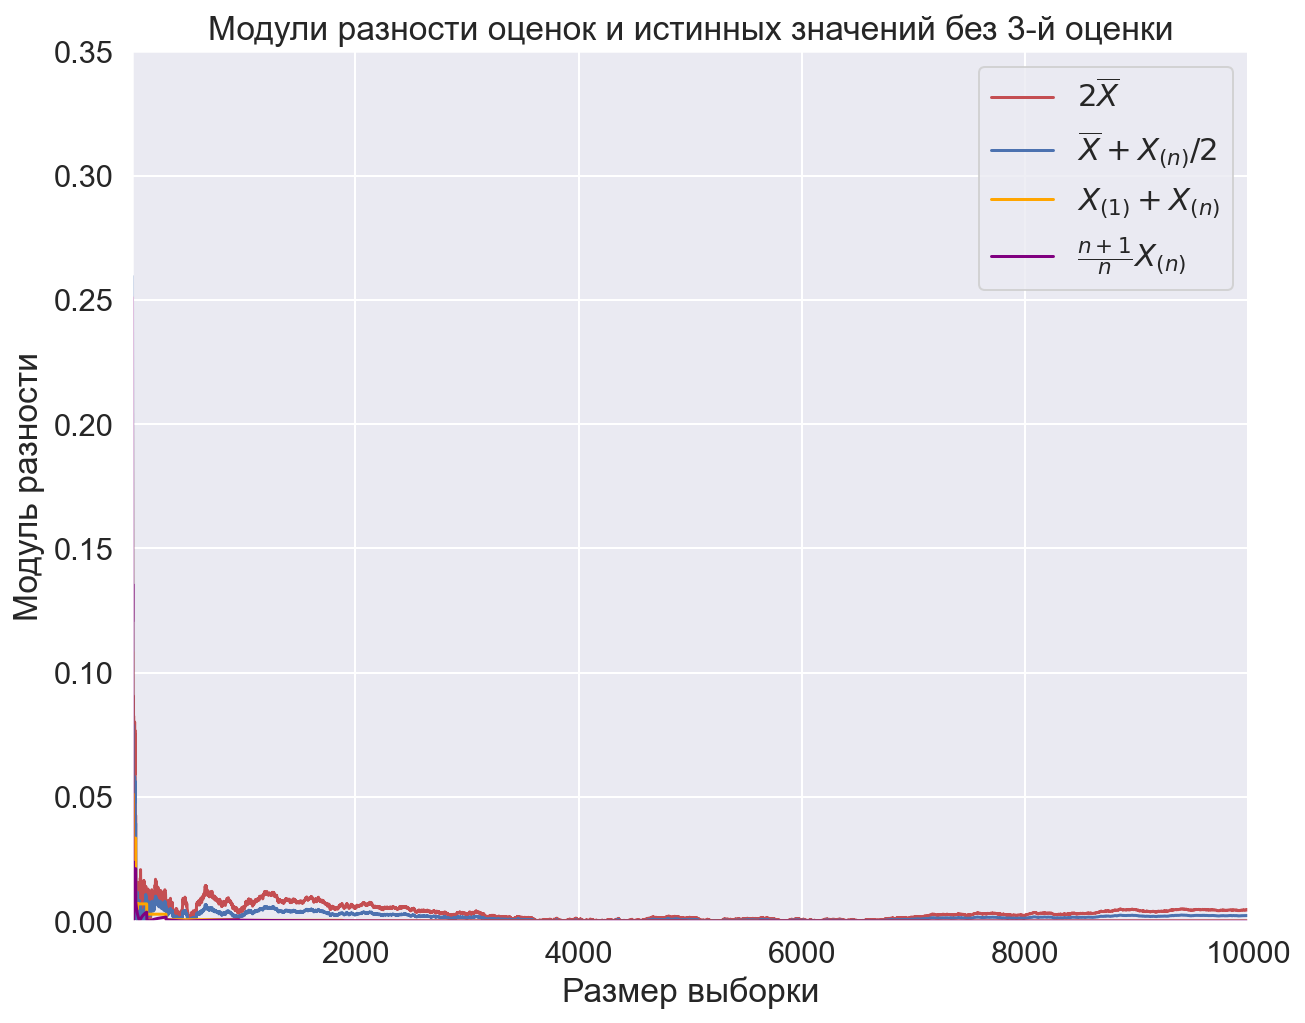

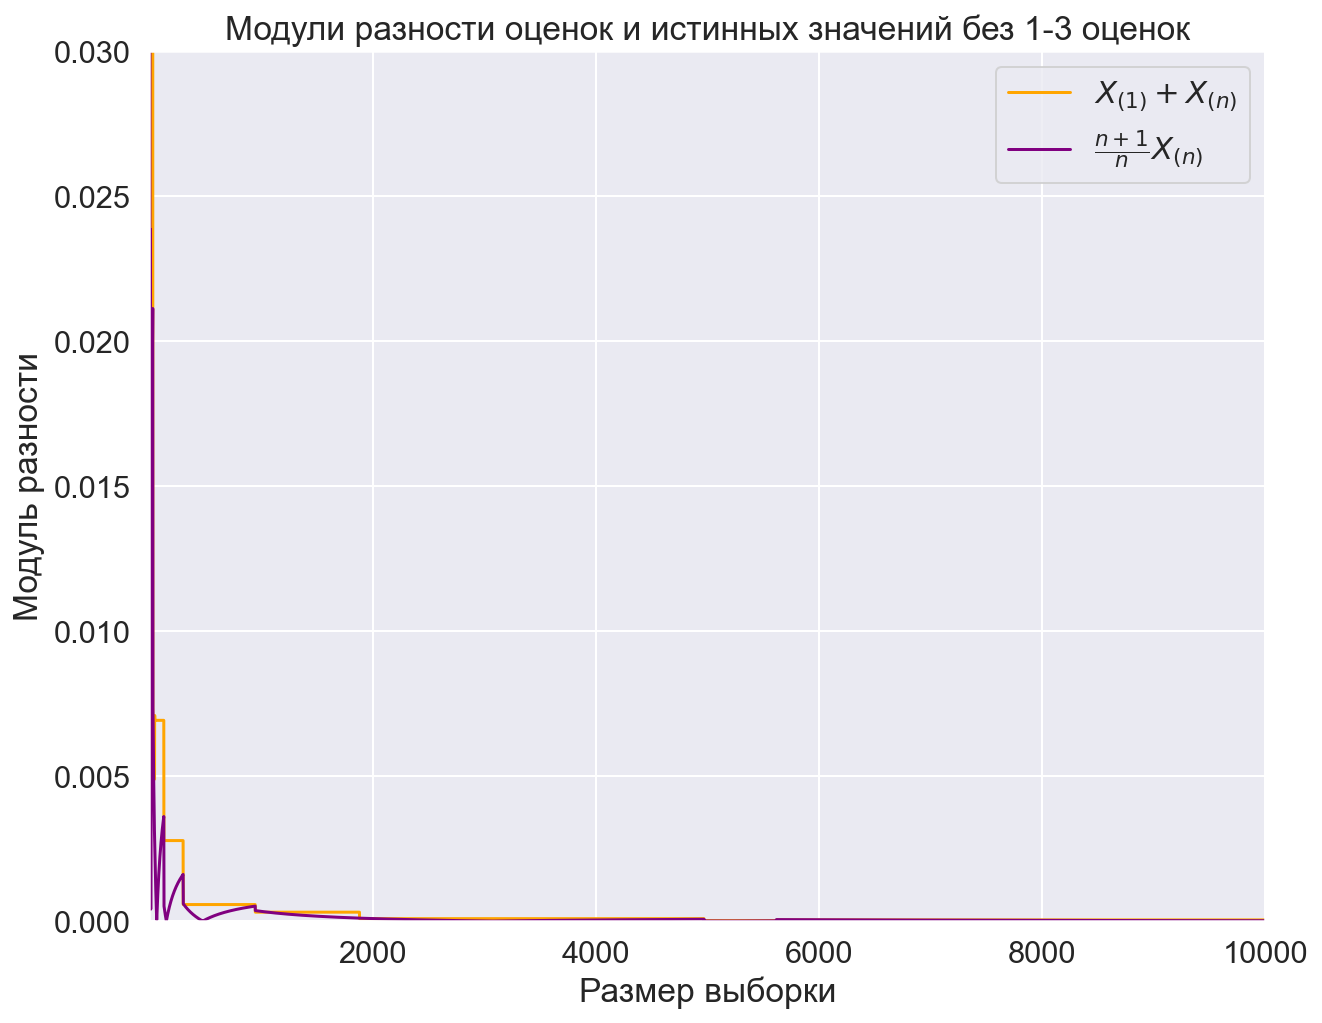

Tetta =  1


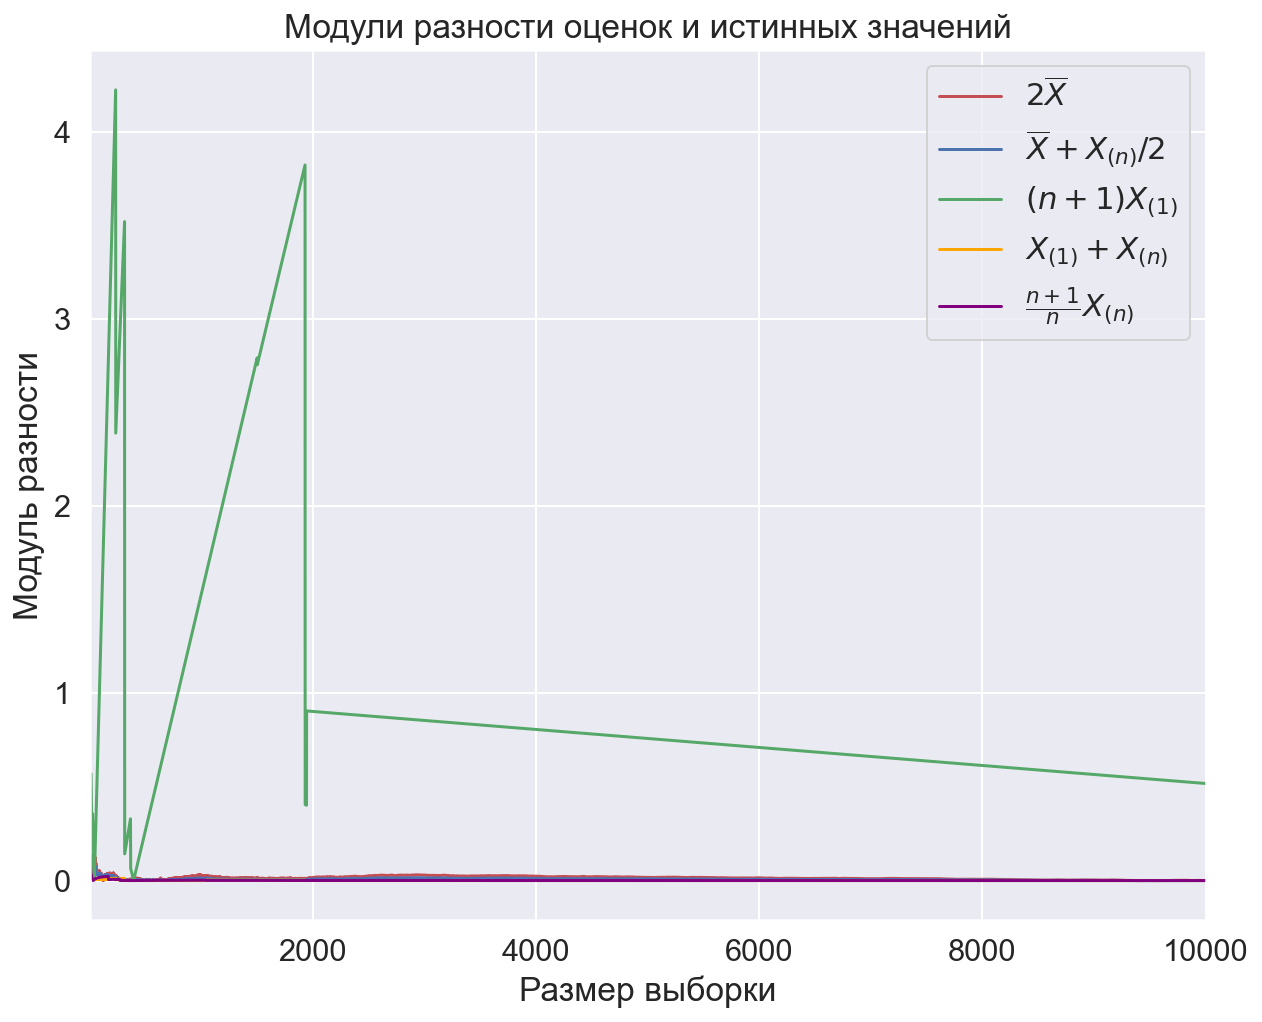

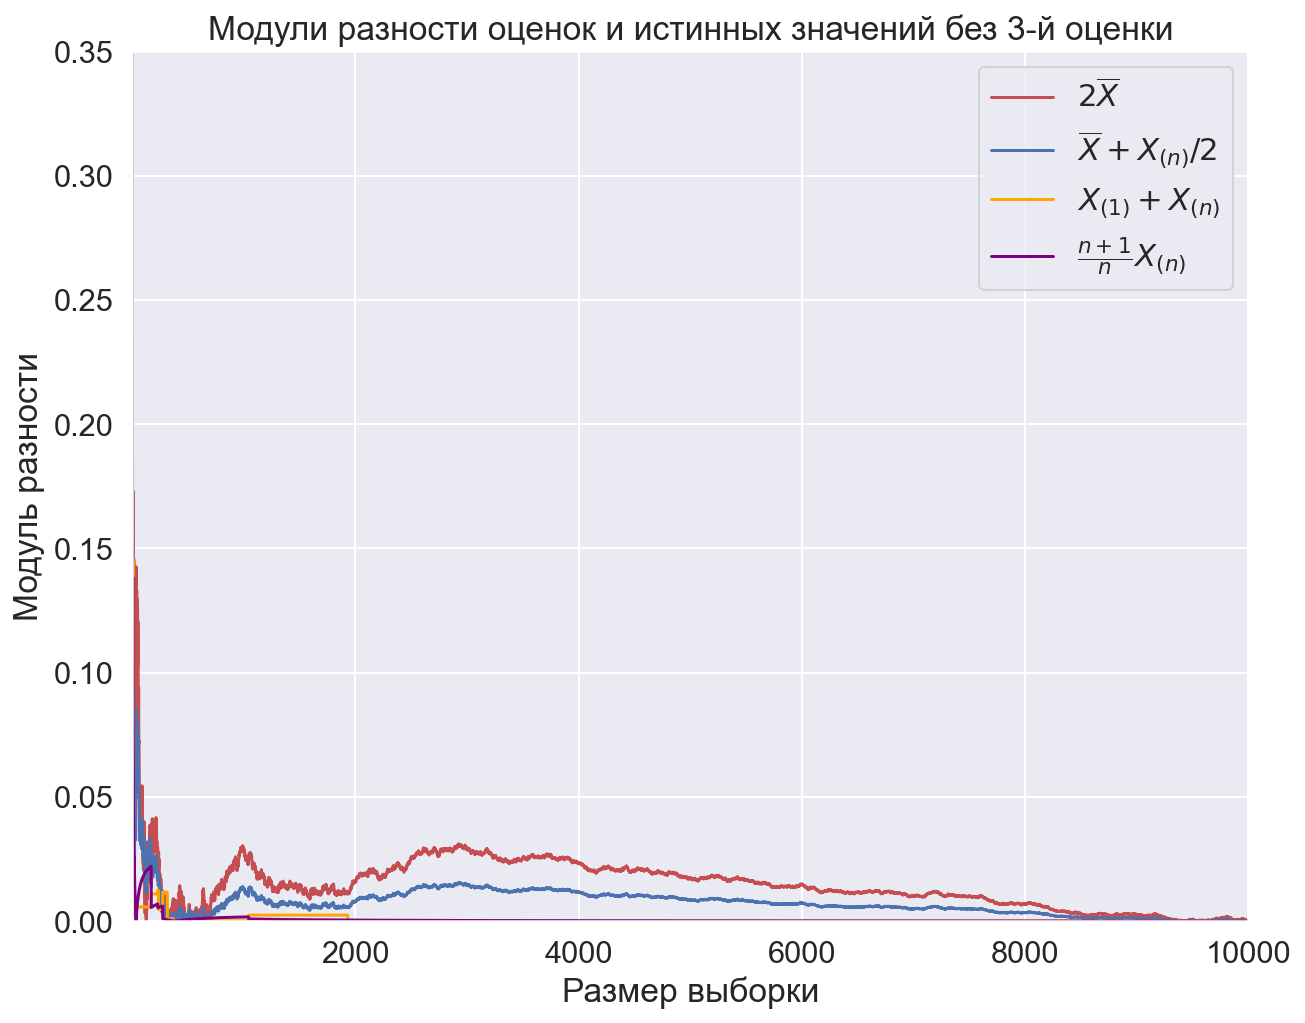

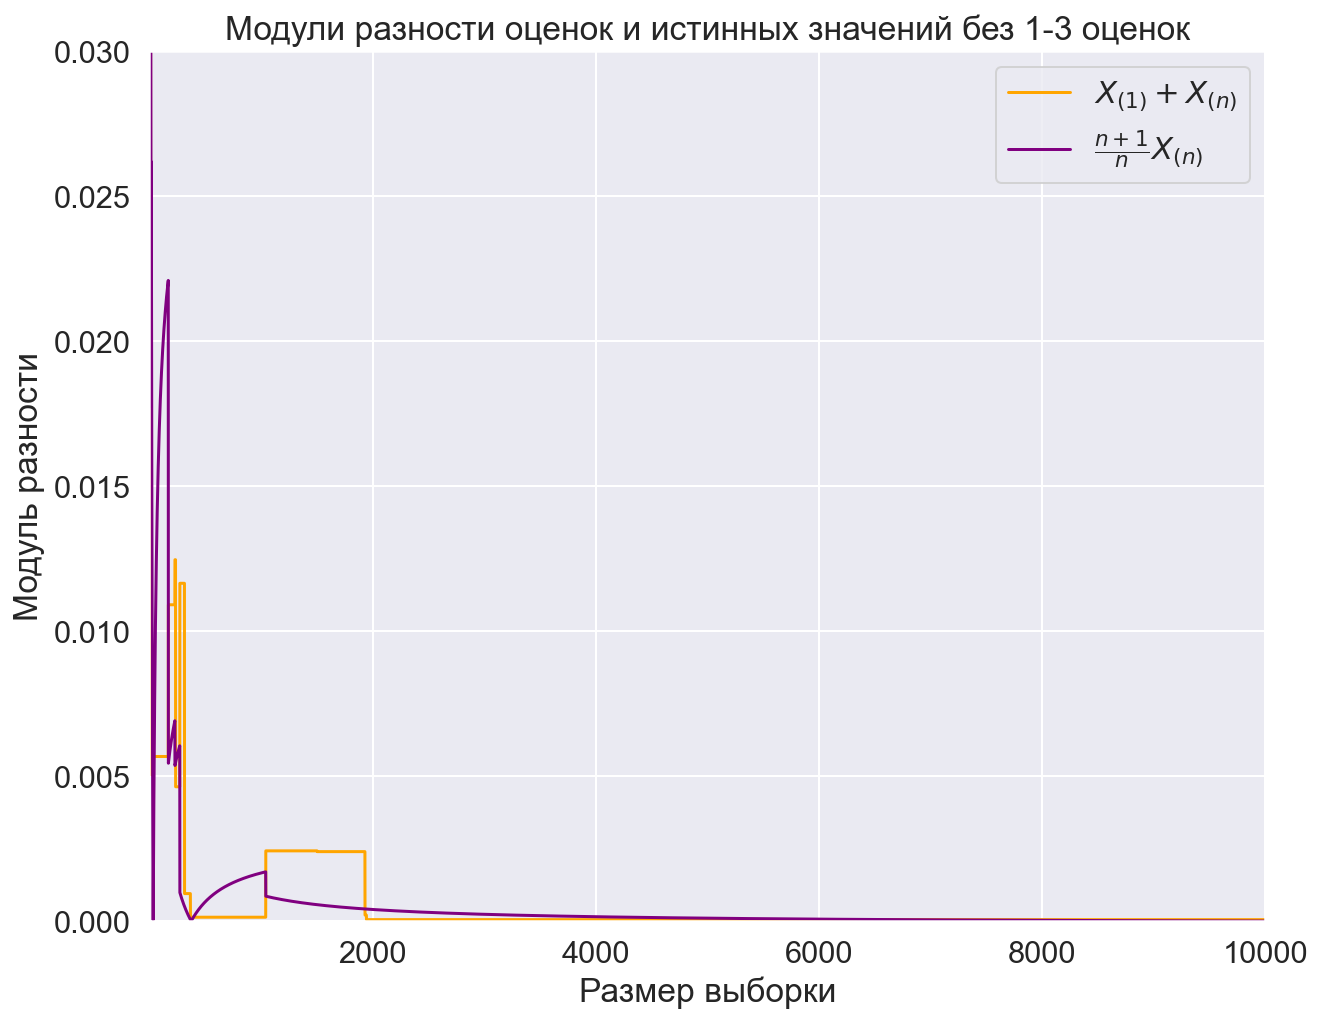

Tetta =  5


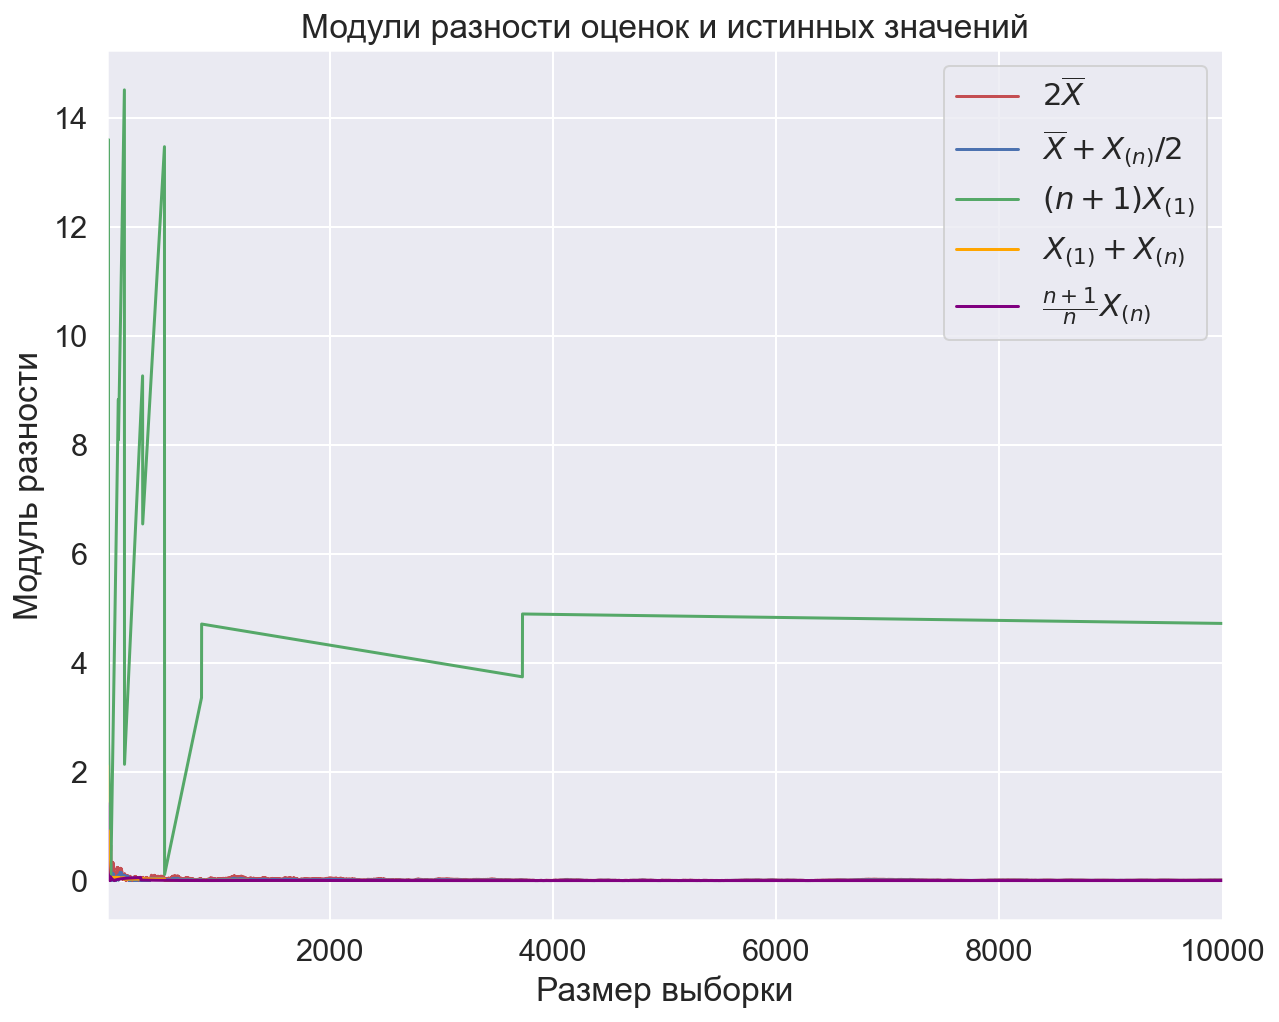

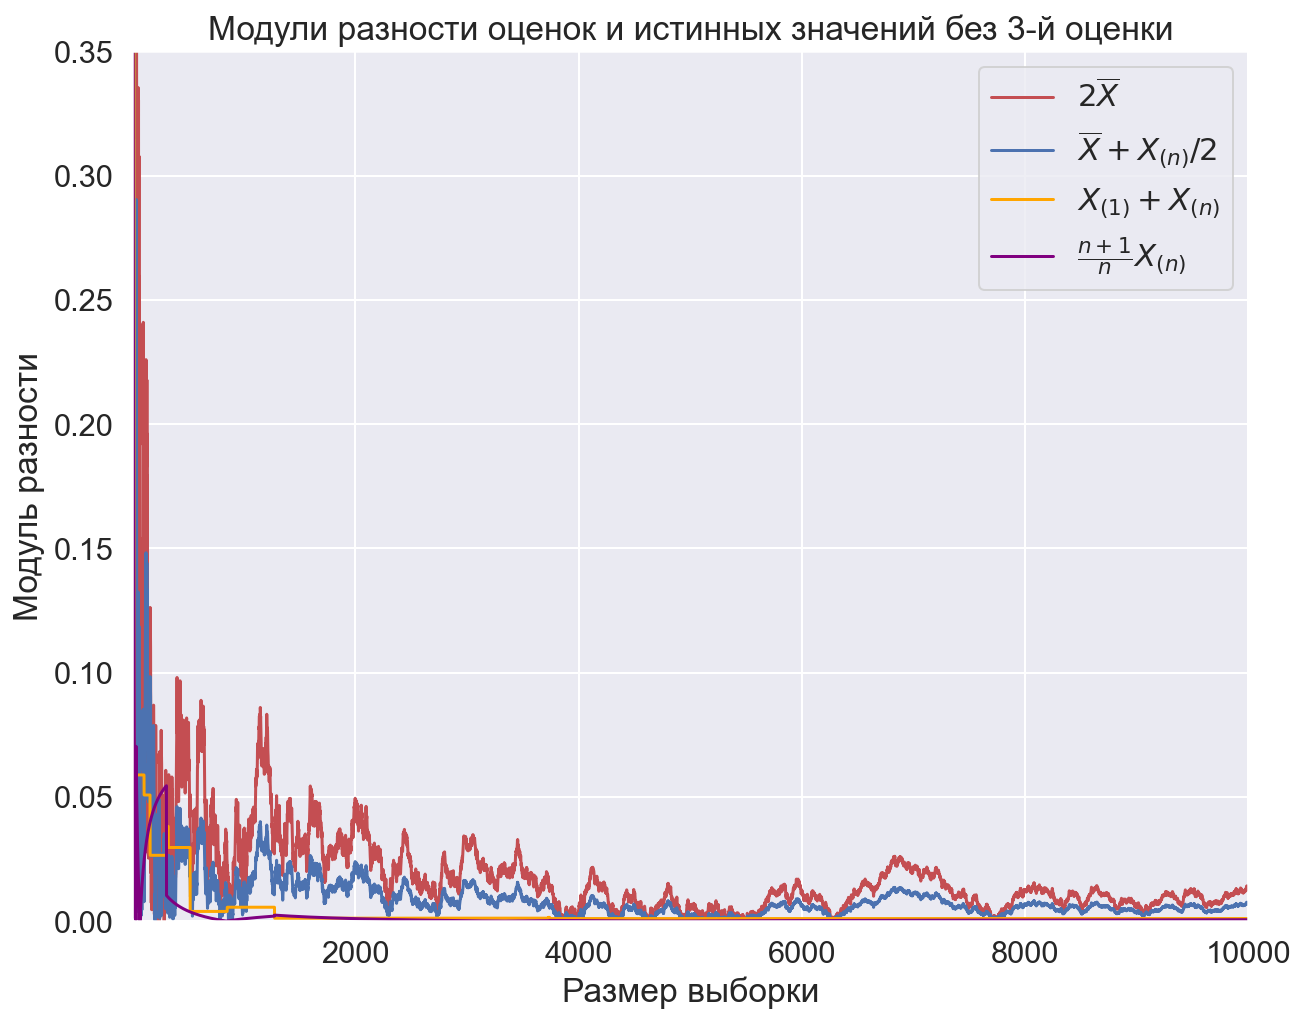

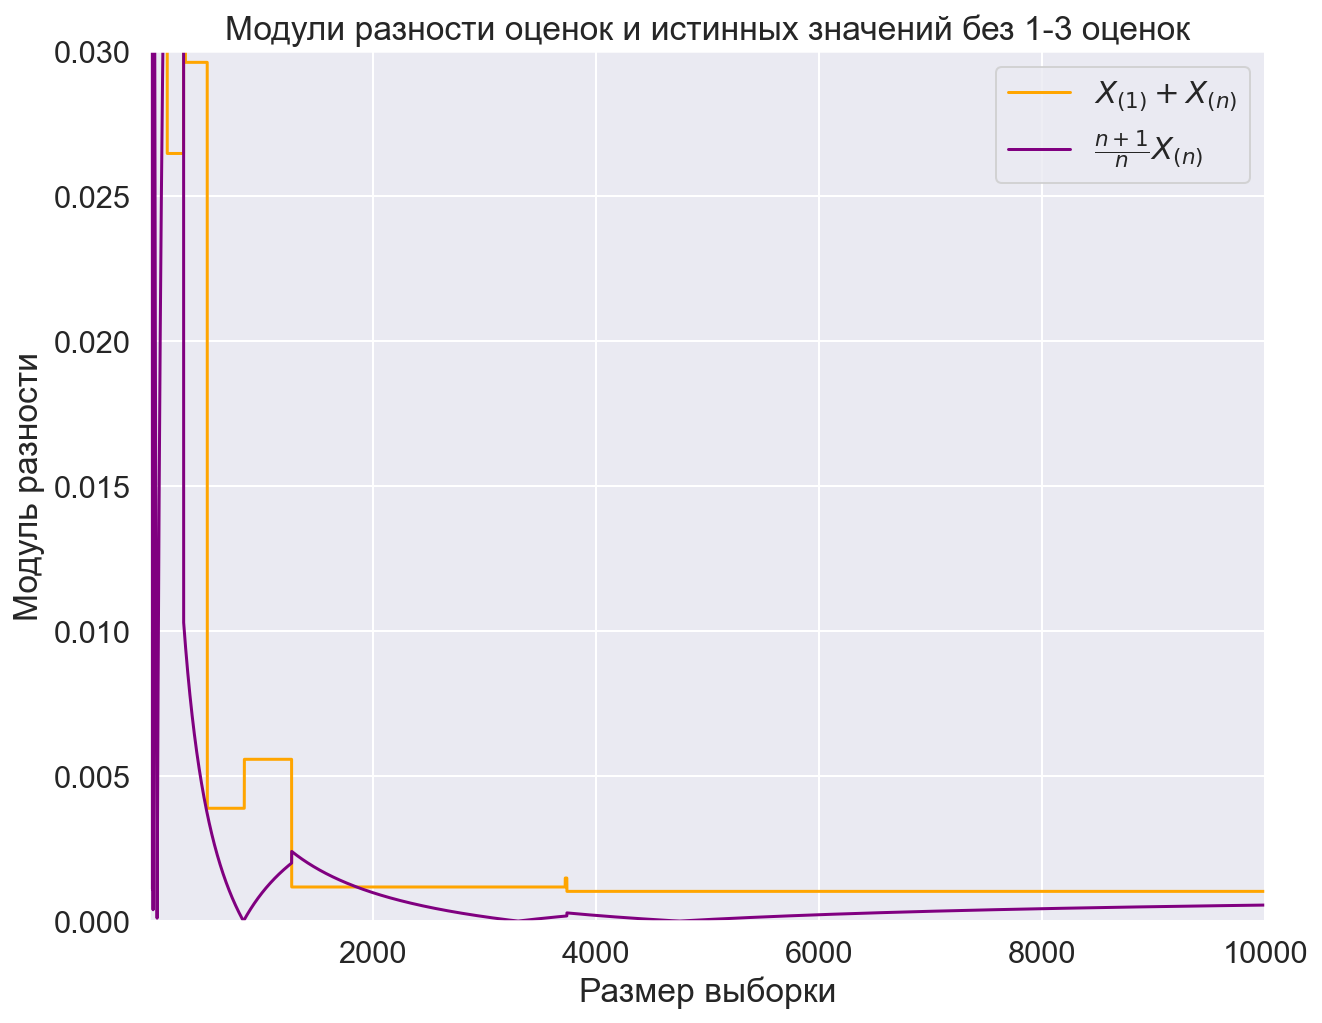

Tetta =  10


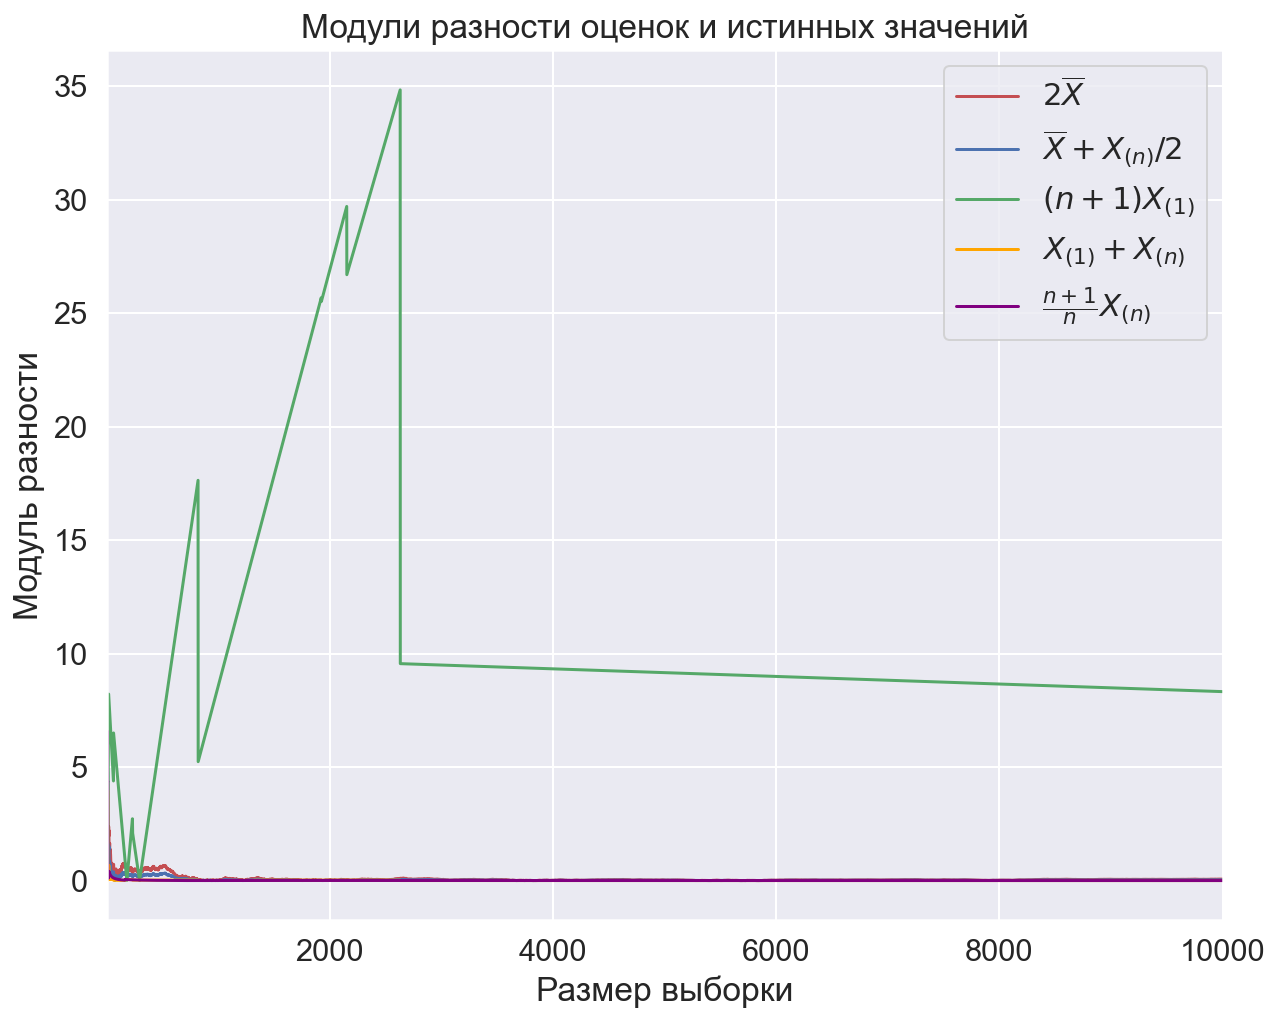

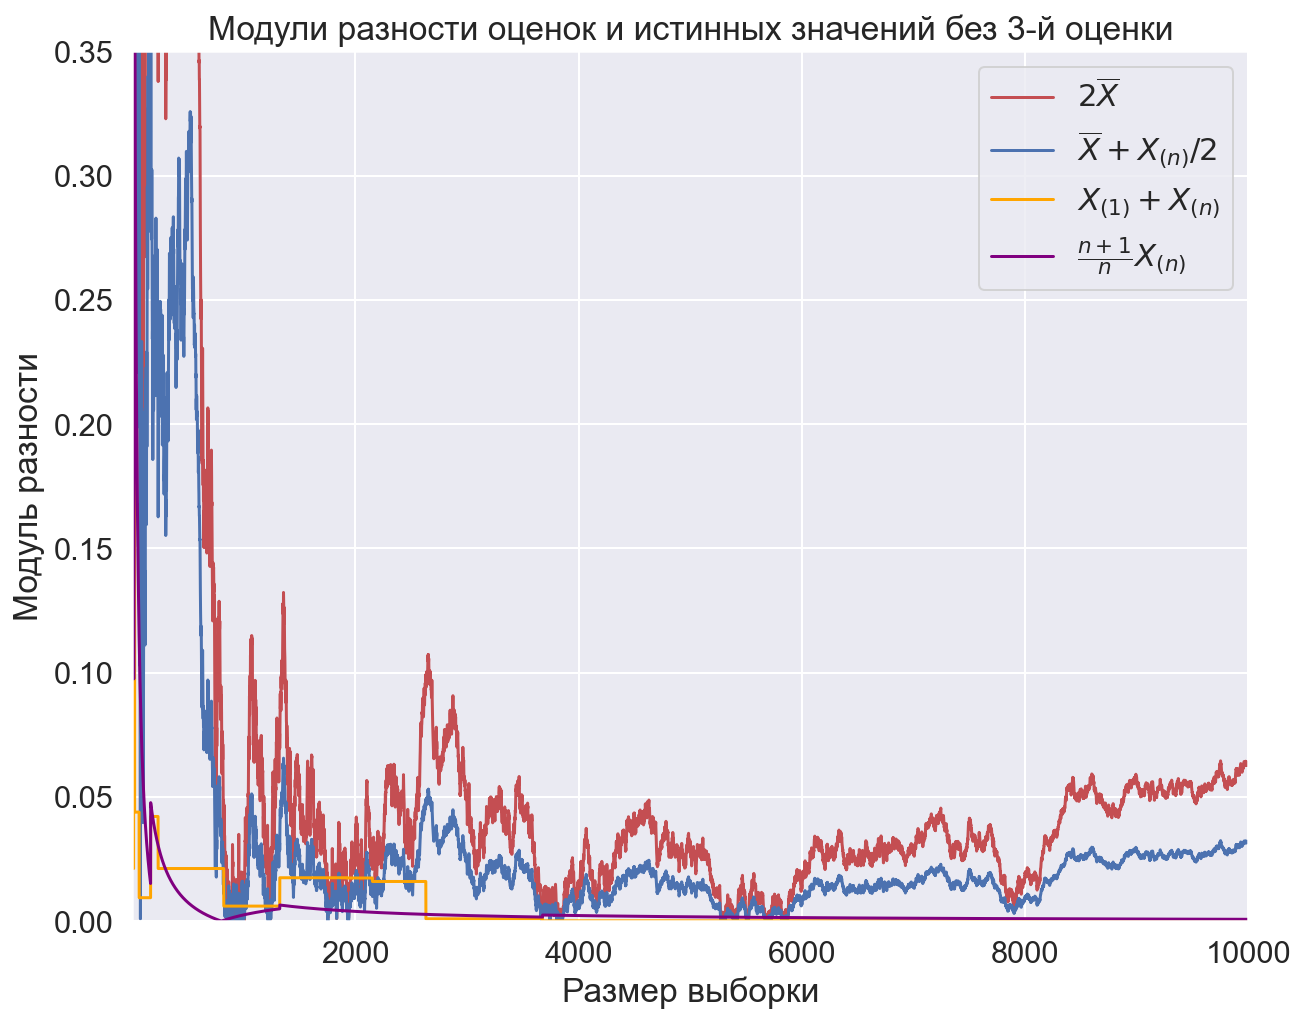

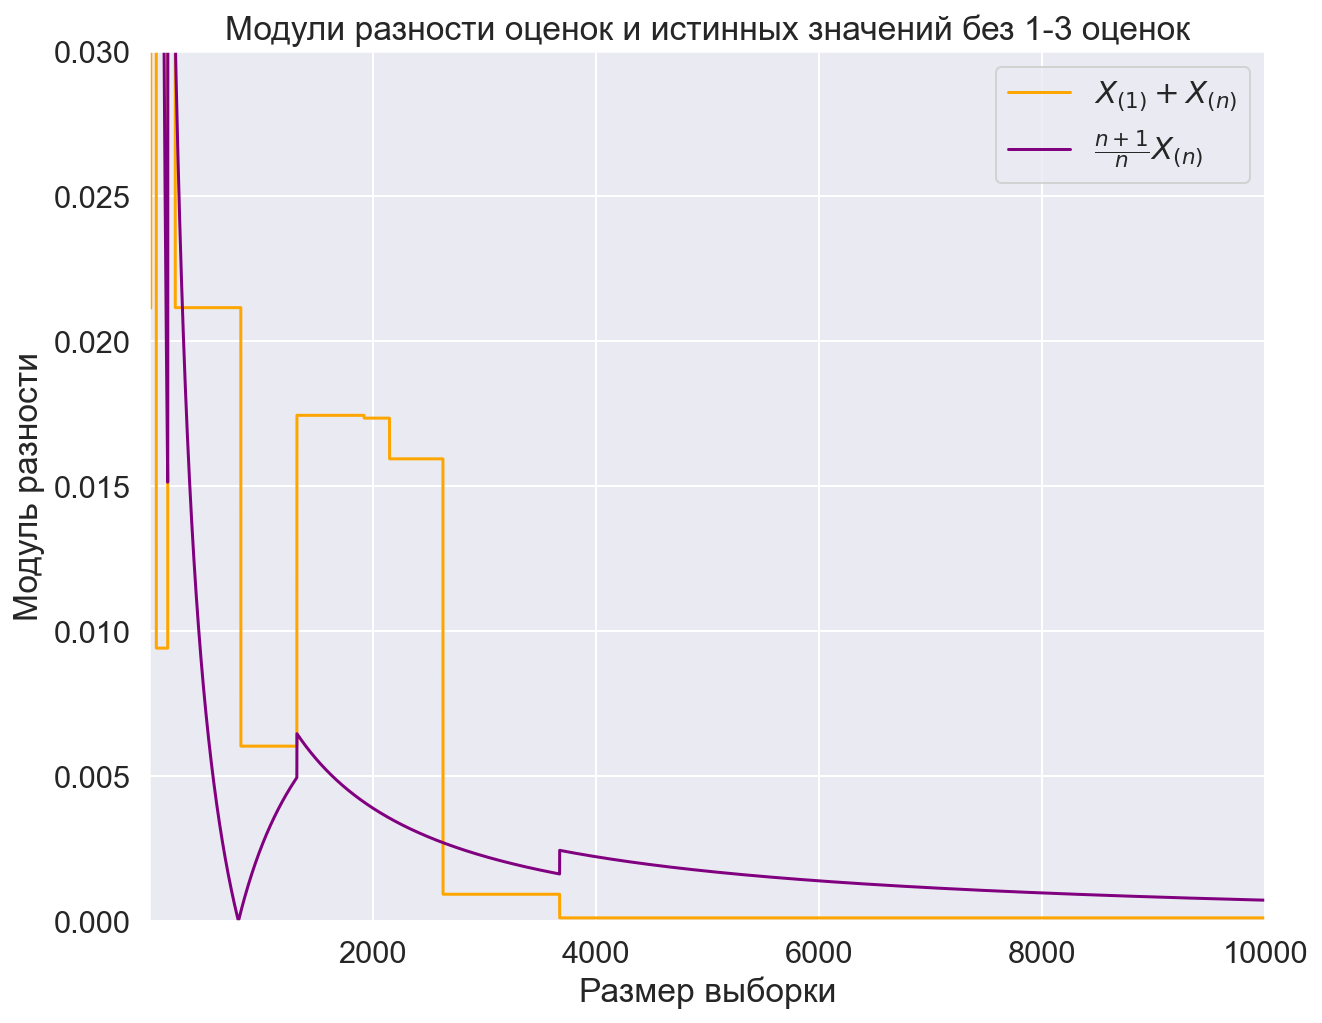

Tetta =  25


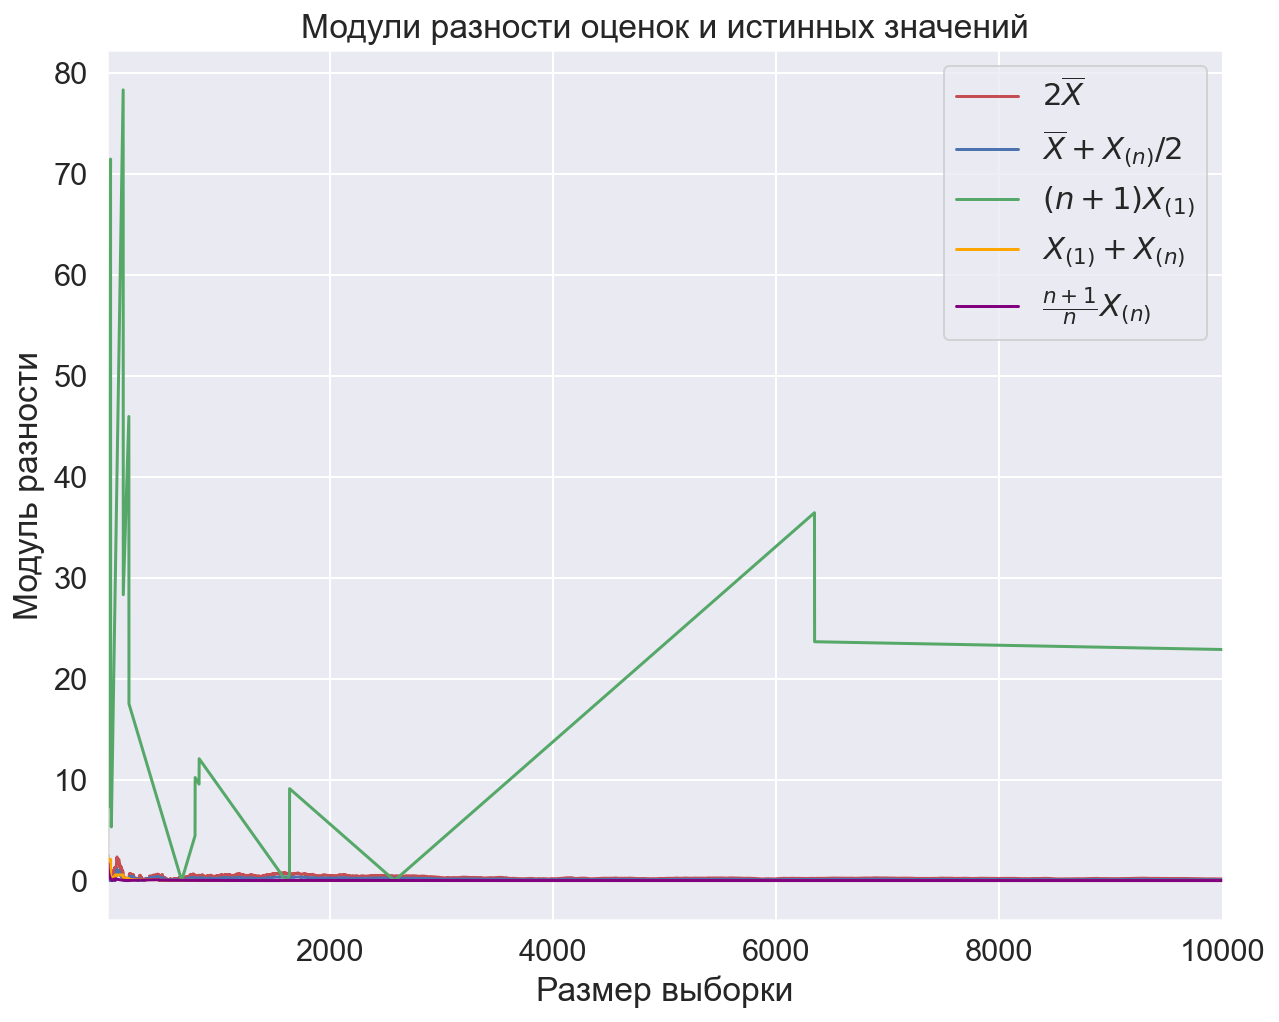

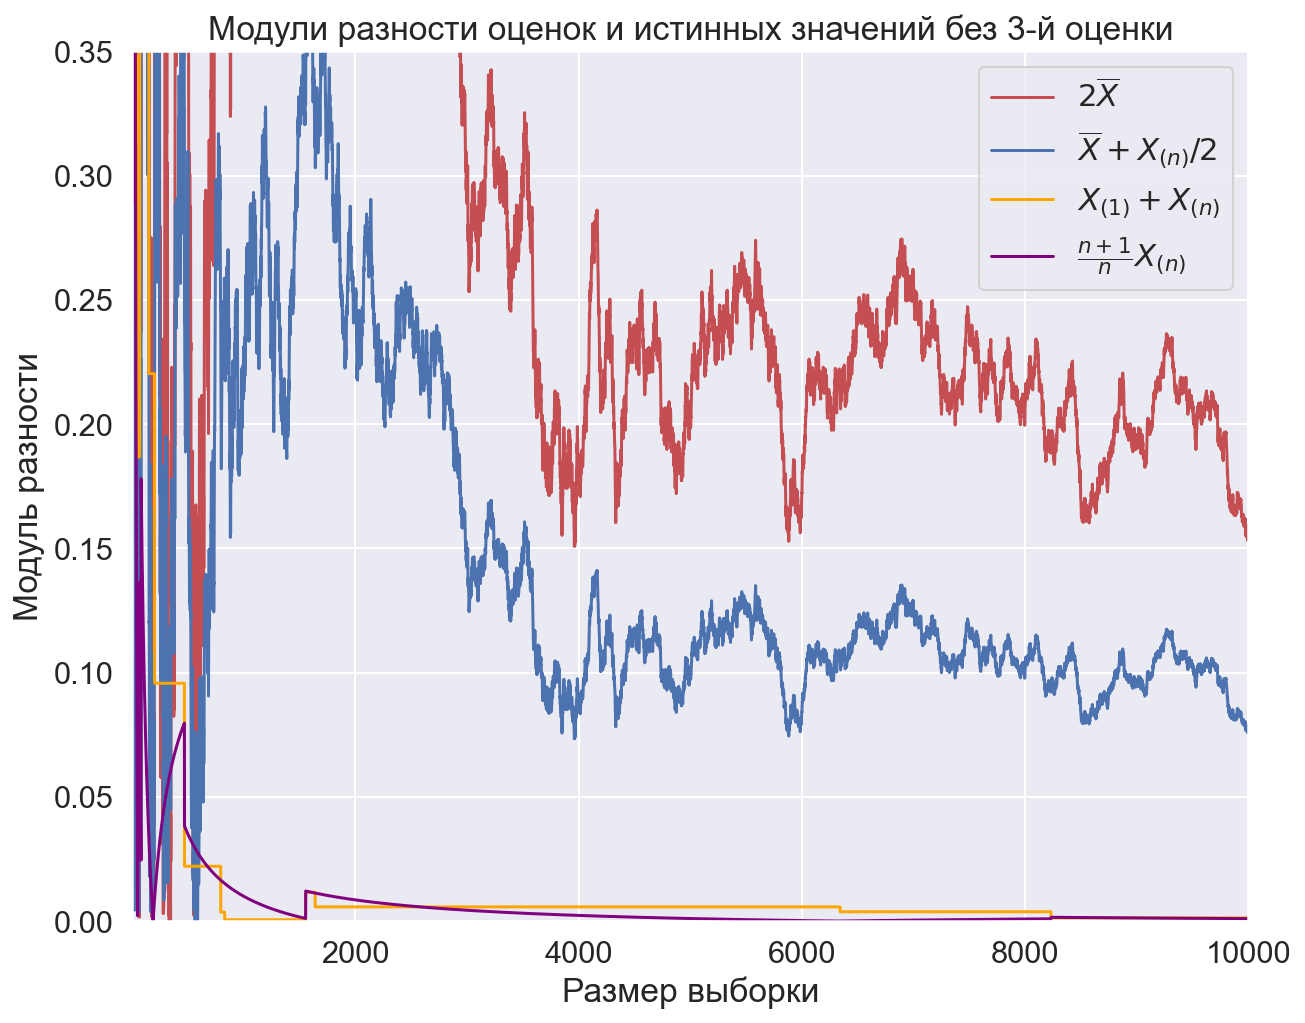

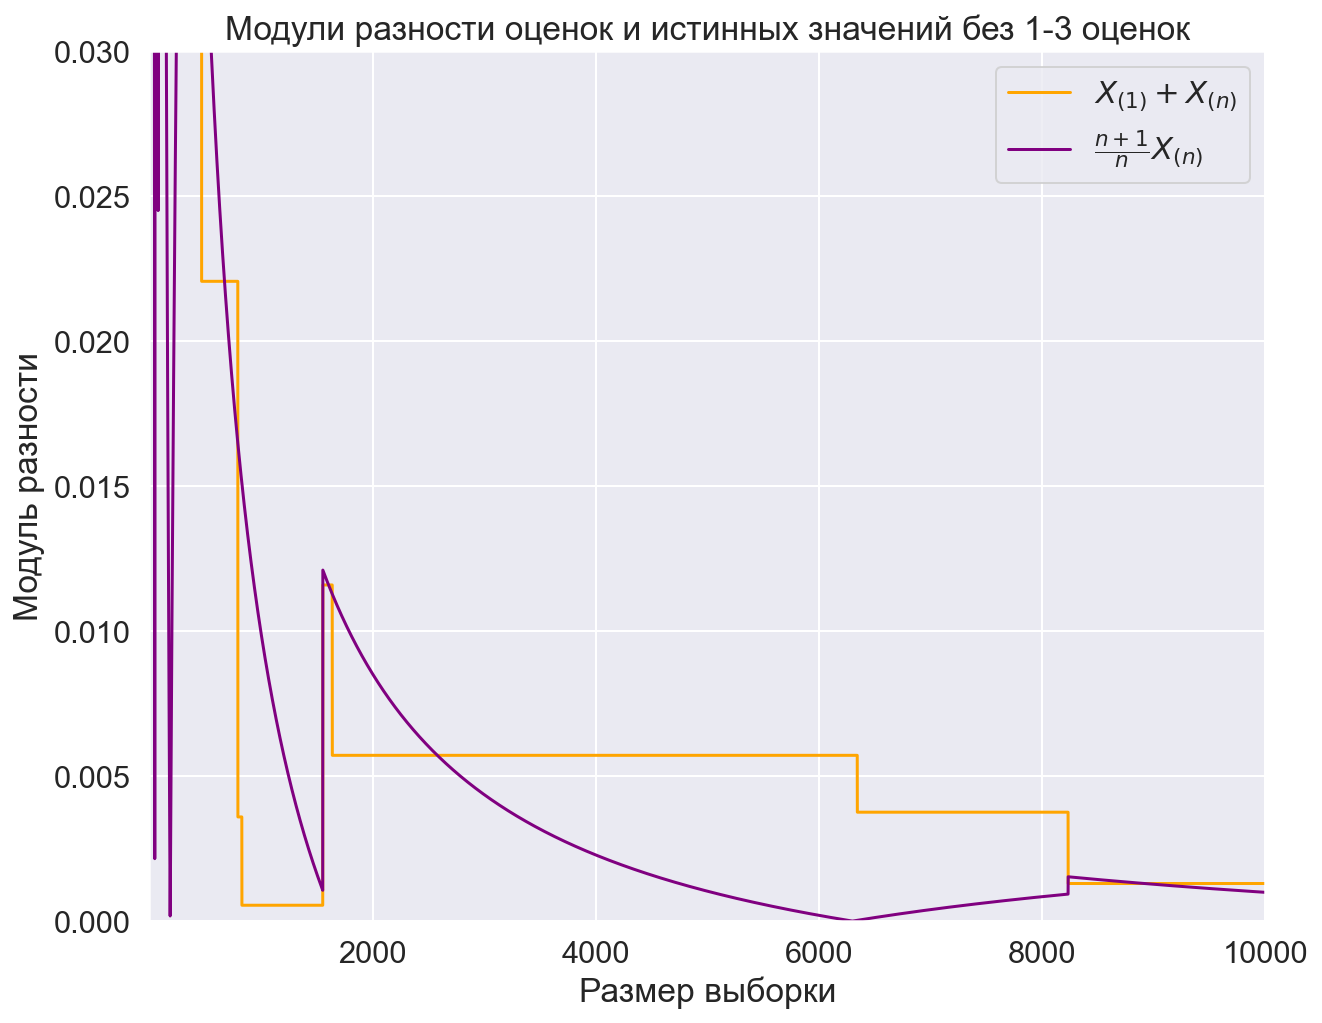

In [6]:
for tetta in [0.5, 1, 5, 10, 25]:
    samples = sps.uniform(loc=0, scale=tetta).rvs(N)
    mean = np.cumsum(samples)/np.arange(1, N+1)
    x_1 = np.minimum.accumulate(samples)
    x_n = np.maximum.accumulate(samples)

    est_1 = 2*mean
    est_2 = mean + x_n/2
    est_3 = x_1*np.arange(2, N+2)
    est_4 = x_1 + x_n
    est_5 = x_n*np.arange(2, N+2)/np.arange(1, N+1)
    
    plt.figure(figsize=(10,8))
    
    print("Tetta = ", tetta)
    plt.title("Модули разности оценок и истинных значений")

    plt.plot(np.arange(1, N+1), np.abs(est_1 - tetta), label = r"$2\overline{X}$", color='r')
    plt.plot(np.arange(1, N+1), np.abs(est_2 - tetta), label = r"$\overline{X} + X_{(n)}/ 2$", color='b')
    plt.plot(np.arange(1, N+1), np.abs(est_3 - tetta), label = r"$(n+1)X_{(1)}$", color='g')
    plt.plot(np.arange(1, N+1), np.abs(est_4 - tetta), label = r"$X_{(1)}+X_{(n)}$", color='orange')
    plt.plot(np.arange(1, N+1), np.abs(est_5 - tetta), label = r"$\frac{n+1}{n} X_{(n)}$", color='purple')

    plt.xlim(1, N)
    plt.legend()
    plt.xlabel("Размер выборки")
    plt.ylabel("Модуль разности")
    plt.show()


    plt.figure(figsize=(10,8))
    plt.title("Модули разности оценок и истинных значений без 3-й оценки")

    plt.plot(np.arange(1, N+1), np.abs(est_1 - tetta), label = r"$2\overline{X}$", color='r')
    plt.plot(np.arange(1, N+1), np.abs(est_2 - tetta), label = r"$\overline{X} + X_{(n)}/ 2$", color='b')
    plt.plot(np.arange(1, N+1), np.abs(est_4 - tetta), label = r"$X_{(1)}+X_{(n)}$", color='orange')
    plt.plot(np.arange(1, N+1), np.abs(est_5 - tetta), label = r"$\frac{n+1}{n} X_{(n)}$", color='purple')

    plt.xlim(1, N)
    plt.ylim(0, 0.35)
    plt.legend()
    plt.xlabel("Размер выборки")
    plt.ylabel("Модуль разности")
    plt.show()


    plt.figure(figsize=(10,8))
    plt.title("Модули разности оценок и истинных значений без 1-3 оценок")

    plt.plot(np.arange(1, N+1), np.abs(est_4 - tetta), label = r"$X_{(1)}+X_{(n)}$", color='orange')
    plt.plot(np.arange(1, N+1), np.abs(est_5 - tetta), label = r"$\frac{n+1}{n} X_{(n)}$", color='purple')

    plt.xlim(1, N)
    plt.ylim(0, 0.03)
    plt.legend()
    plt.xlabel("Размер выборки")
    plt.ylabel("Модуль разности")
    plt.show()
    

Сделайте вывод.


__Вывод:__ Из графиков можно сделать вывод, что наилучшей оценкой является $\frac{n+1}{n} X_{(n)}$. Как было посчитано на семинарах, её дисперсия равна $\frac{\theta}{n(n+2)}$, что говорит о высокой точности данной оценки. 


Модули разности всех оценок за исключением 3-ей стремятся к нулю и ведут себя похожим образом при изменении $\theta$. Оценка $(n+1)X_{(1)}$ дает большое значение ошибки. О низкой точности данной оценки можно также судить по её дисперсии: $\frac{n\theta ^2}{n+2}$.

### Задача 2

Придумайте распределение, у которого конечны первые два момента, а третий – нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

Рассмотрим распределение с плотностью $p_\xi(x) = \frac{3}{x^4}I(x \ge 1)$.


$F(\infty) = \int_{1}^{\infty} \frac{3}{x^4}\,dx = 1$

Первые два момента конечны, в третий - нет:

$E\xi = \int_{1}^{\infty} \frac{3x}{x^4}\,dx < \infty$

$E\xi^2 = \int_{1}^{\infty} \frac{3x^2}{x^4}\,dx < \infty$

$E\xi^3 = \int_{1}^{\infty} \frac{3x^3}{x^4}\,dx = \infty$

In [7]:
N = int(1e4)

class Distribution(sps.rv_continuous):
    def _pdf(self, x):  
        return 3*(x** -4)*(x >= 1)
    def _cdf(self, x):
        return (1-(x** -3))*(x >= 1)

dist = Distribution(name='distribution')
samples_2 = dist.rvs(size = N)

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

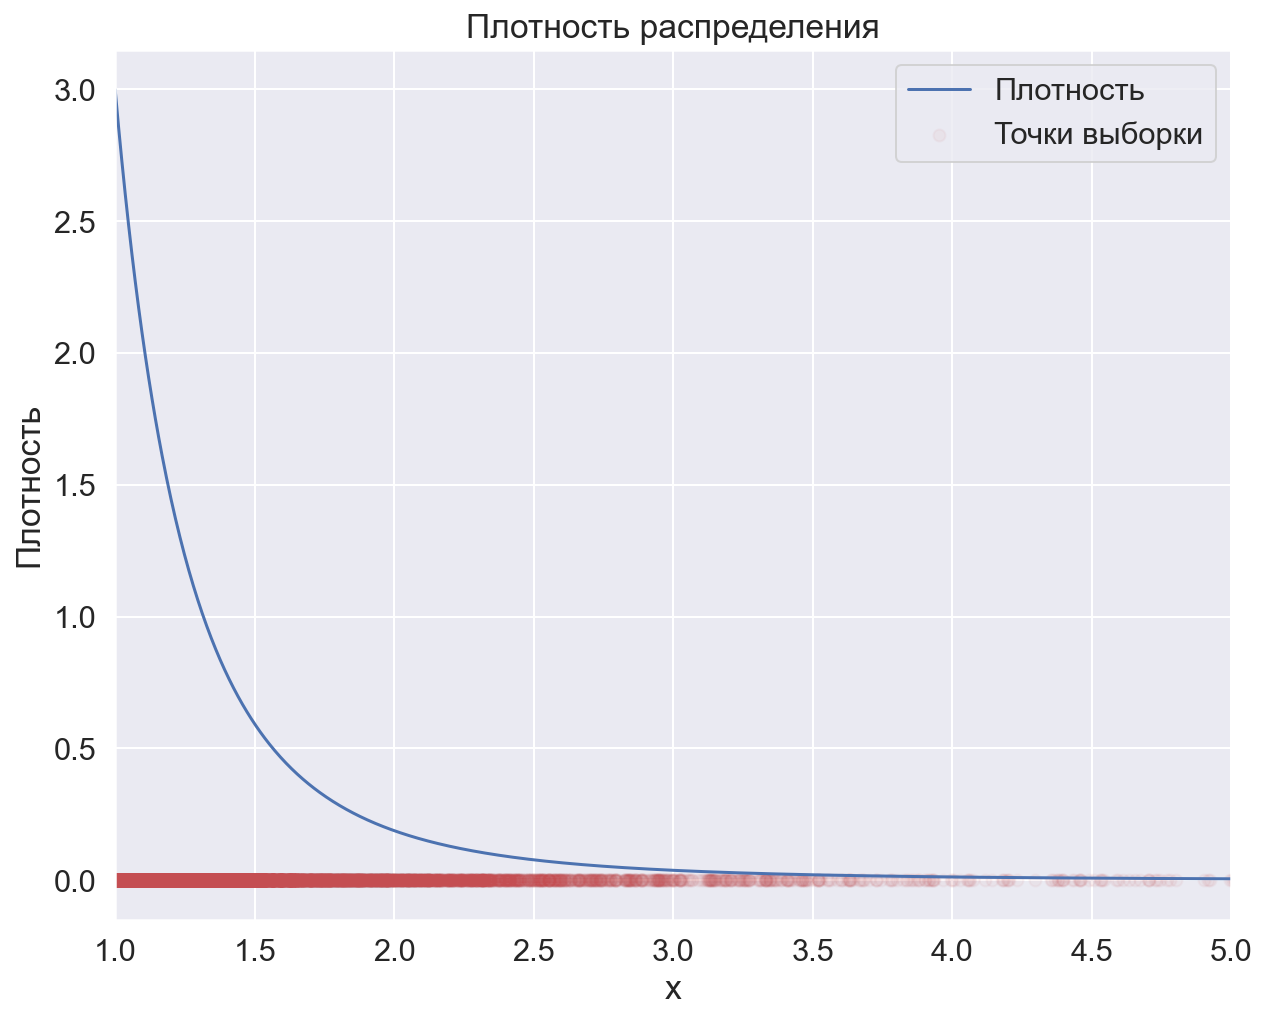

In [8]:
plt.figure(figsize=(10,8))
plt.title("Плотность распределения")

a = np.linspace(1, 5, 1000)
plt.plot(a, dist.pdf(a), label = r"Плотность", color='b')
plt.xlim(1, 5)
plt.scatter(samples_2, [0]*N, label = r"Точки выборки", color='r', alpha = 0.05)

plt.legend()
plt.xlabel("x")
plt.ylabel("Плотность")

plt.show()

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

In [9]:
est = np.cumsum(samples_2**2)/np.arange(1, N+1) - (np.cumsum(samples_2)/np.arange(1, N+1))**2

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

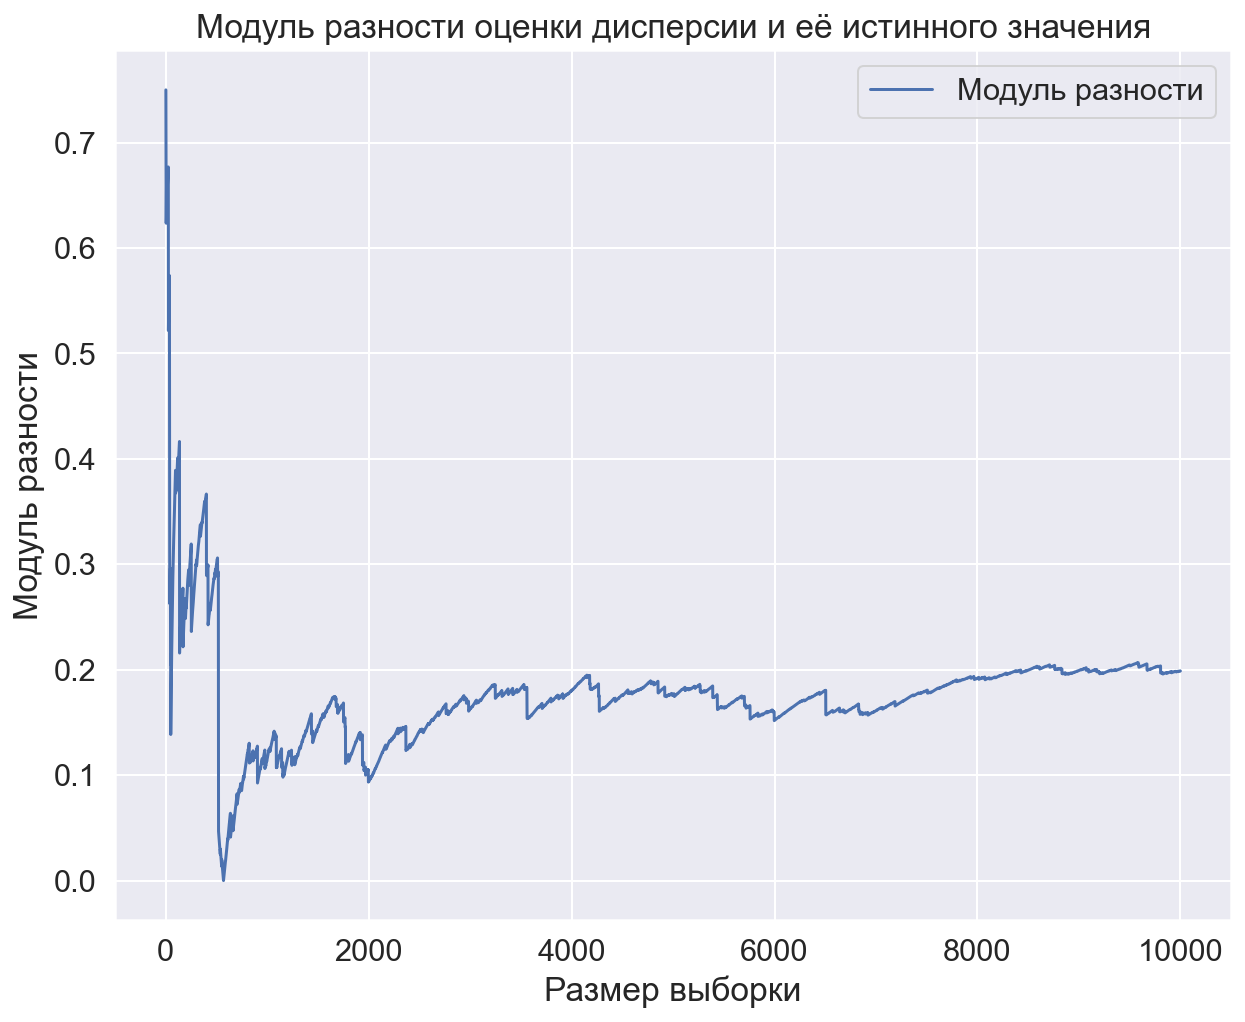

In [10]:
plt.figure(figsize=(10,8))
plt.title("Модуль разности оценки дисперсии и её истинного значения")

var = dist.var()
plt.plot(np.arange(1, N+1), np.abs(est - var), label = r"Модуль разности", color='b')

plt.legend()
plt.xlabel("Размер выборки")
plt.ylabel("Модуль разности")

plt.show()

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


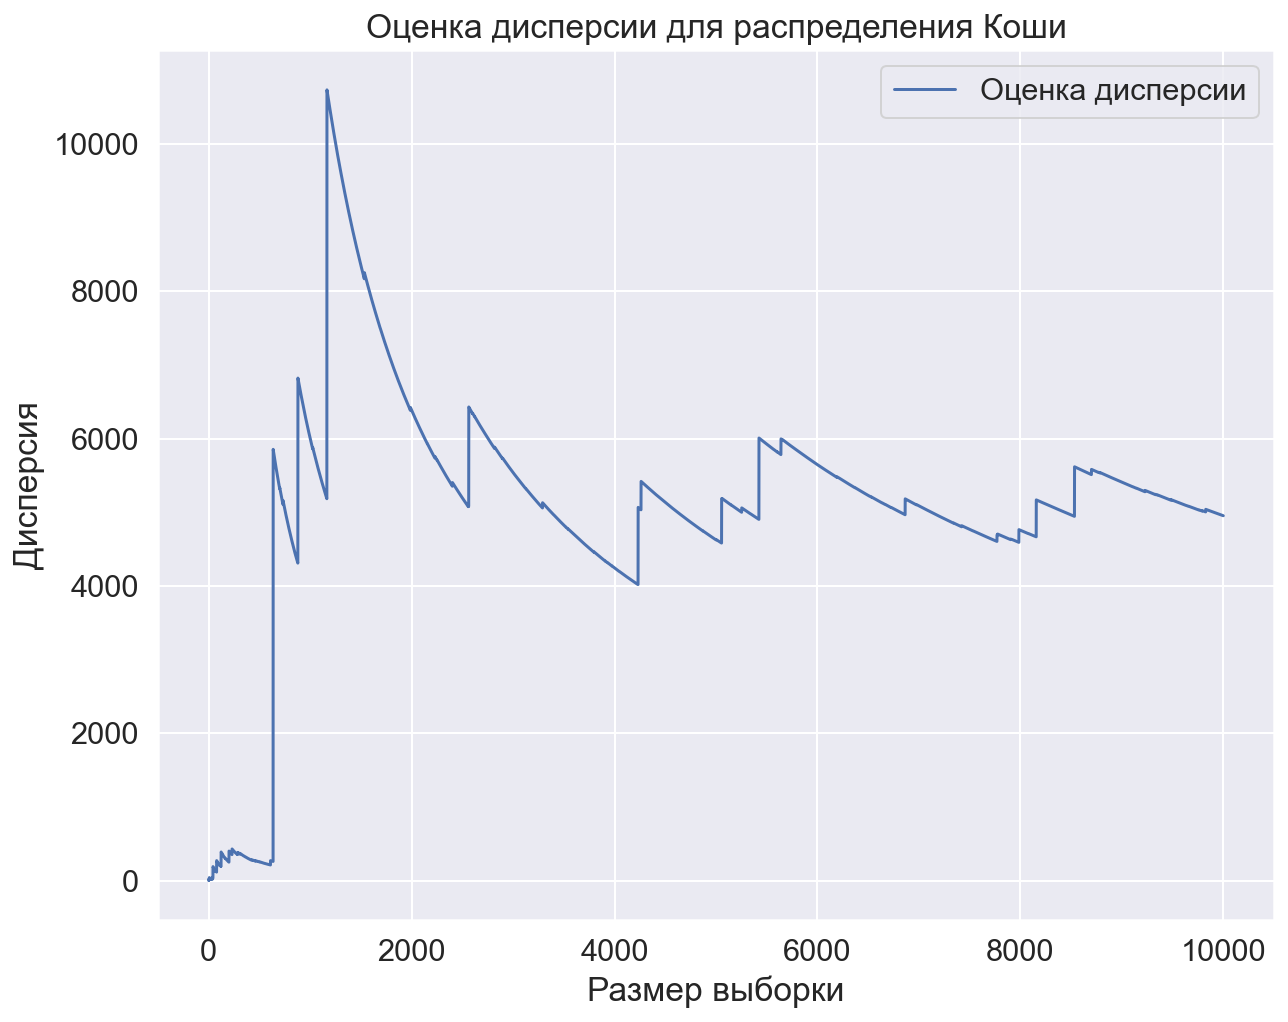

In [11]:
samples_2_1 = sps.cauchy.rvs(size=N)
est_2 = np.cumsum(samples_2_1**2)/np.arange(1, N+1) - (np.cumsum(samples_2_1)/np.arange(1, N+1))**2

plt.figure(figsize=(10, 8))
plt.title("Оценка дисперсии для распределения Коши")

plt.plot(np.arange(1, N+1), est_2, label="Оценка дисперсии")

plt.legend()
plt.xlabel("Размер выборки")
plt.ylabel("Дисперсия")
plt.show()

### Задача 3

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [12]:
N = int(1e4)
samples_3 = sps.norm().rvs(N)

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [13]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

ecdf = ECDF(samples_3)

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

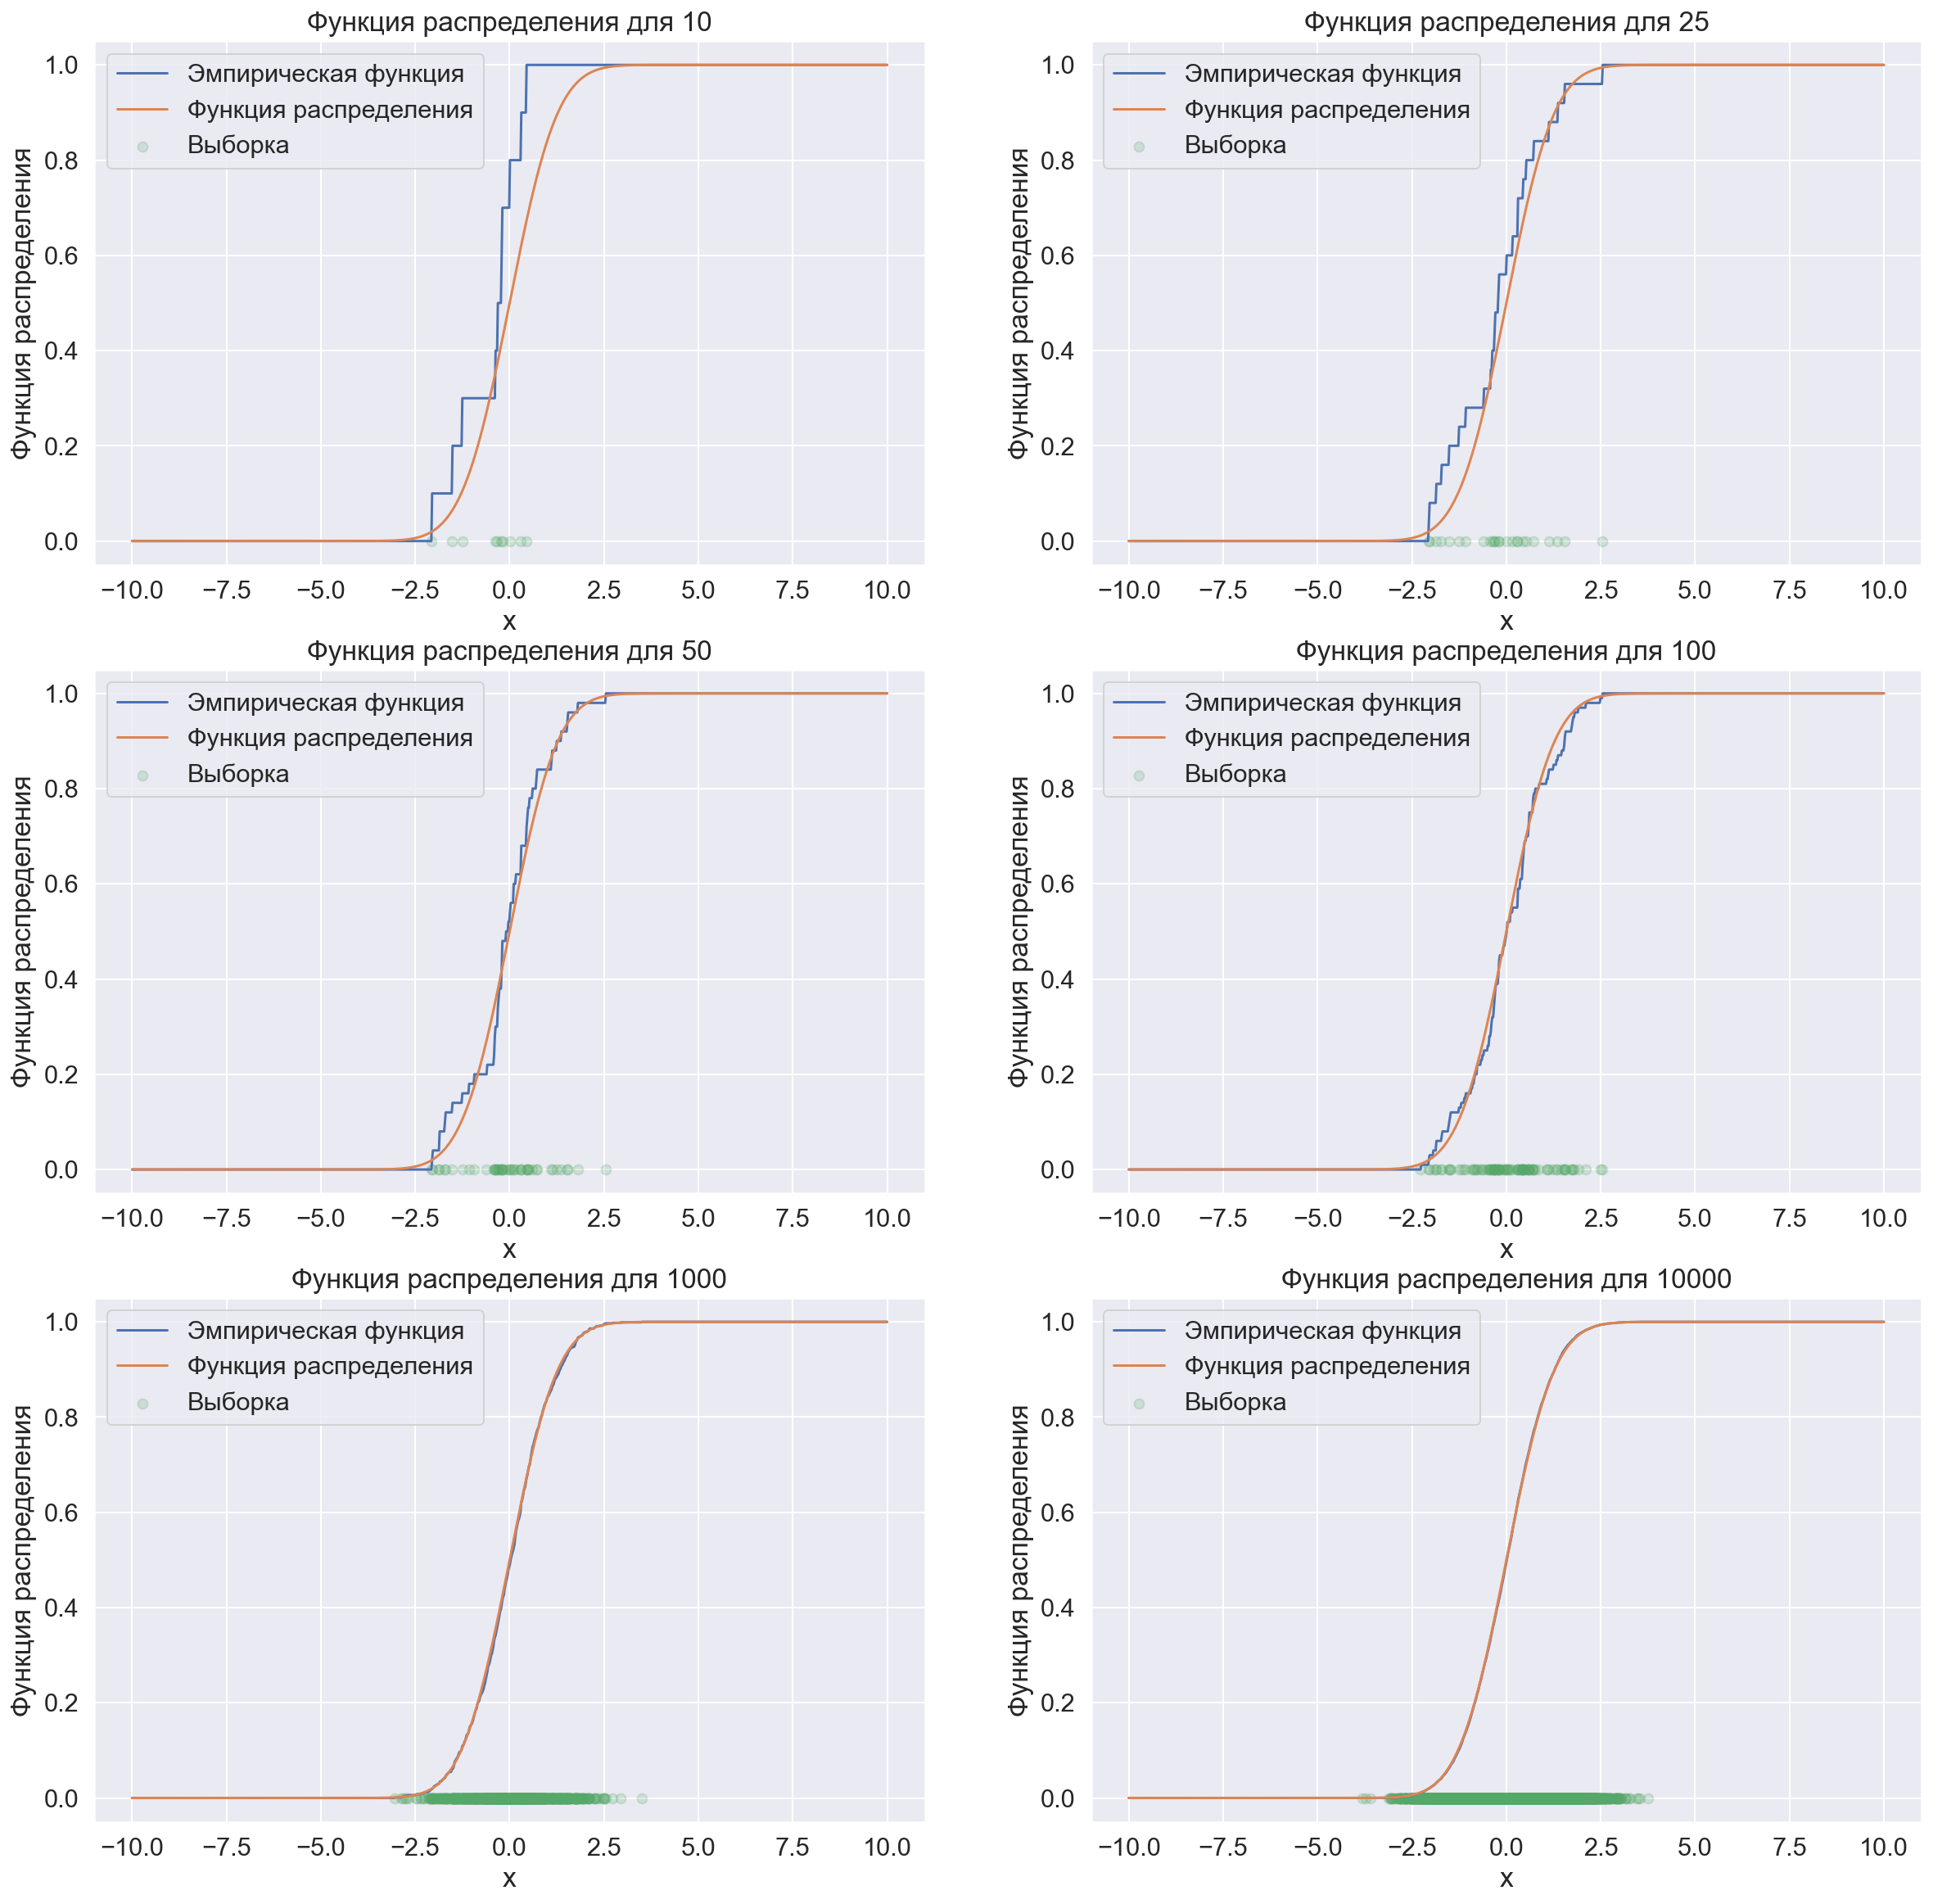

In [14]:
sizes = np.array([10, 25, 50, 100, 1000, N])


plt.figure(figsize=(20, 20))

for i, size in enumerate(sizes):
    plt.subplot(3, 2, i+1)
    plt.title(f"Функция распределения для {size}")
    b = np.linspace(-10, 10, 1000)
    plt.plot(b, ECDF(samples_3[:size])(b), label="Эмпирическая функция")
    plt.plot(b, sps.norm().cdf(b), label="Функция распределения")
    plt.scatter(samples_3[:size], [0]*size, alpha=0.2, label="Выборка", c = 'g')
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("Функция распределения")


plt.show()


Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


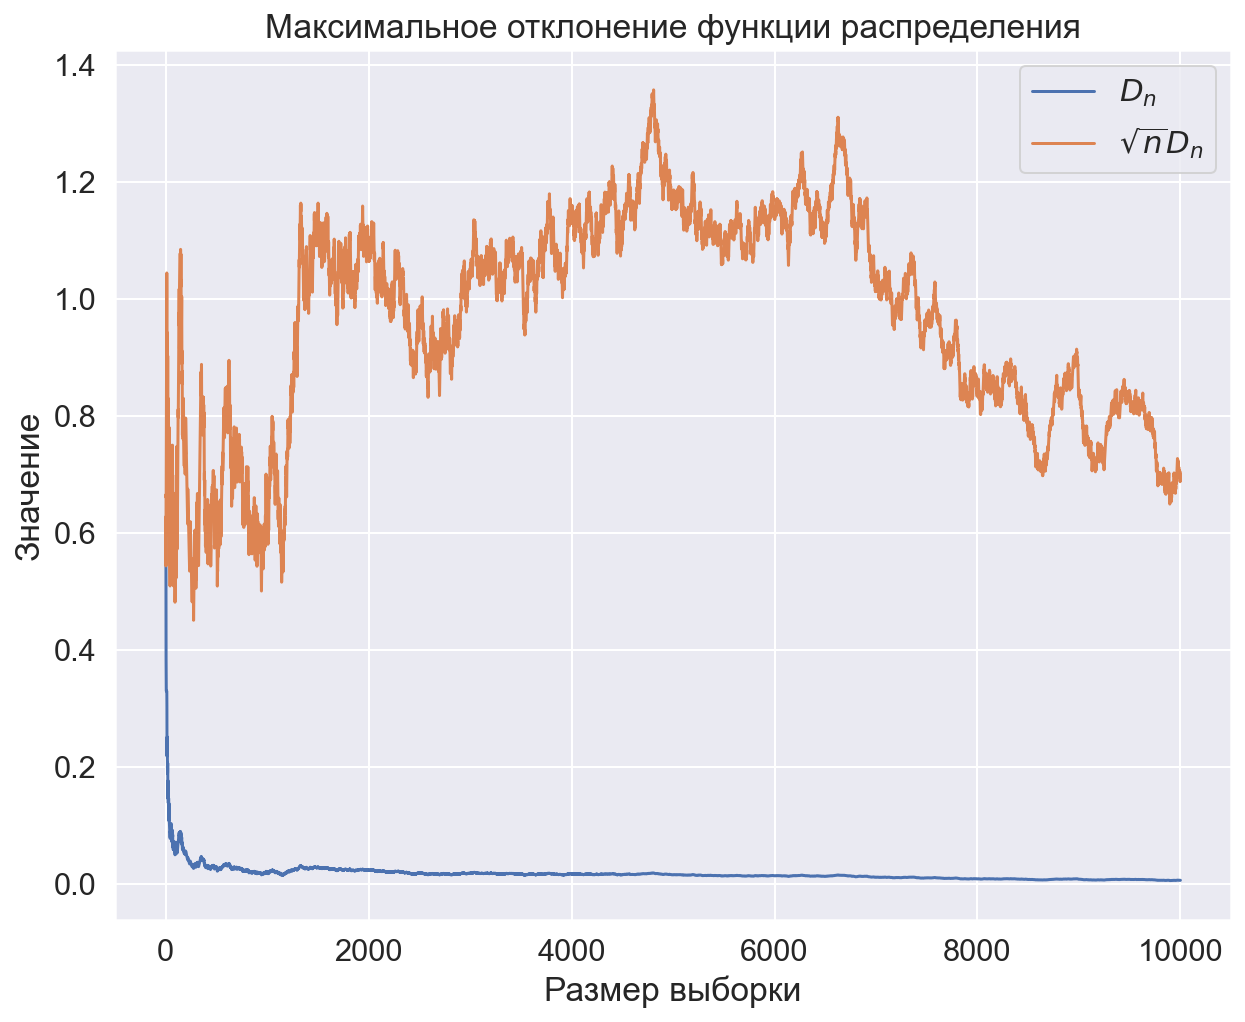

In [15]:
def sup (n):
    return np.max(np.abs(ECDF(samples_3[:n])(samples_3[:n]) - sps.norm().cdf(samples_3[:n])))

d_n = np.vectorize(sup)(np.arange(1, N+1))

plt.figure(figsize=(10, 8))
plt.title("Максимальное отклонение функции распределения")

plt.plot(np.arange(1, N+1), d_n, label=r"$D_{n}$")
plt.plot(np.arange(1, N+1), np.sqrt(np.arange(1, N+1))*d_n, label=r"$\sqrt{n}D_{n}$")


plt.legend()
plt.xlabel("Размер выборки")
plt.ylabel("Значение")
plt.show()

### Задача 4

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

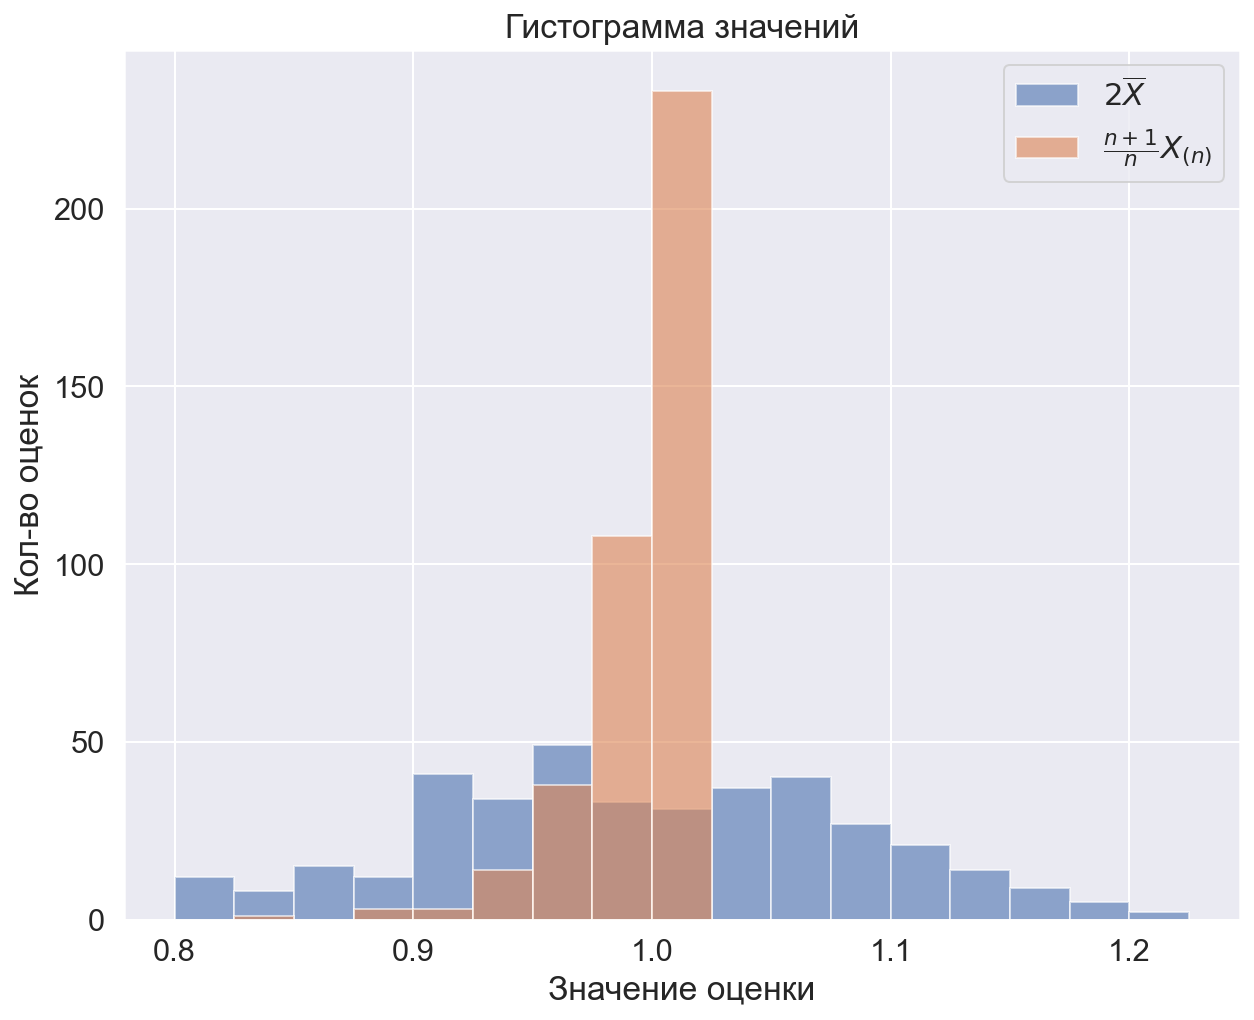

In [16]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]

plt.figure(figsize=(10, 8))
plt.title("Гистограмма значений")

samples_4 = sps.uniform().rvs([N_samples, N])
est_1 = 2*samples_4.mean(axis = 1)
est_2 = (N+1)/N*np.max(samples_4, axis = 1)

plt.hist(est_1,bins=bins, alpha=0.6, label=r"$2\overline{X}$")
plt.hist(est_2,bins=bins, alpha=0.6, label=r"$\frac{n+1}{n}X_{(n)}$")

plt.legend()
plt.ylabel("Кол-во оценок")
plt.xlabel("Значение оценки")
plt.show()

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

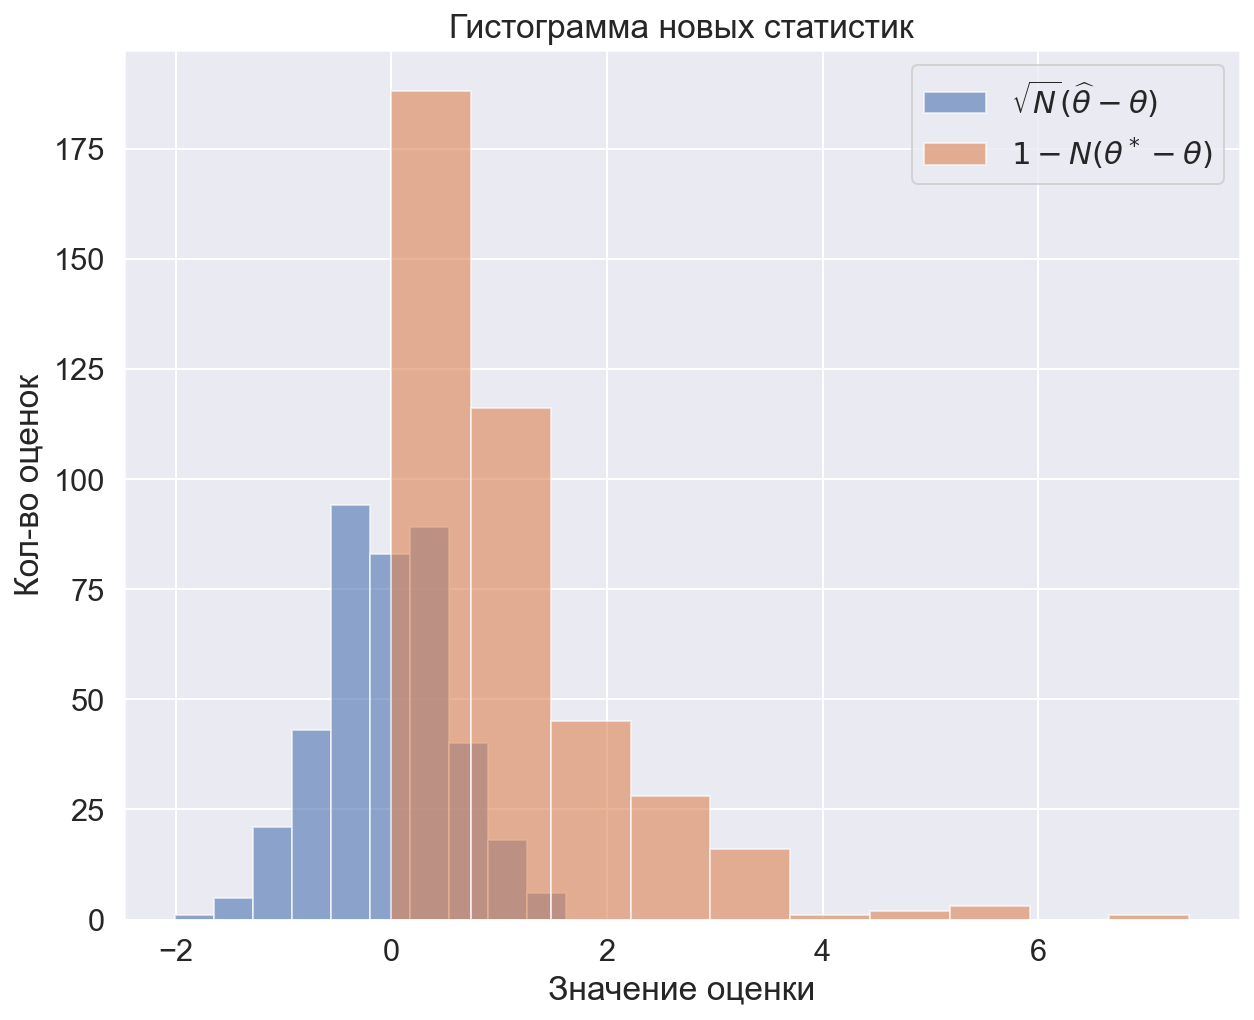

In [17]:
plt.figure(figsize=(10, 8))
plt.title("Гистограмма новых статистик")

# автоматические бины максимально хорошо отображают картину, хоть и разные, поэтому оставила их такими
plt.hist(np.sqrt(N)*(est_1-1), alpha=0.6, label=r"$\sqrt{N}(\widehat{\theta}-\theta)$")
plt.hist(1 - N*(est_2 - 1), alpha=0.6, label=r"$1-N(\theta^*-\theta)$")

plt.legend()
plt.ylabel("Кол-во оценок")
plt.xlabel("Значение оценки")
plt.show()

На какие распределения похожи получившиеся гистограммы?

**Ответ:** $\sqrt{N}(\widehat{\theta}-\theta)$ похоже на нормальное распределение. $1-N(\theta^*-\theta)$ напоминает экпоненциальное распределение

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: $\frac{\theta^2}{3}$

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

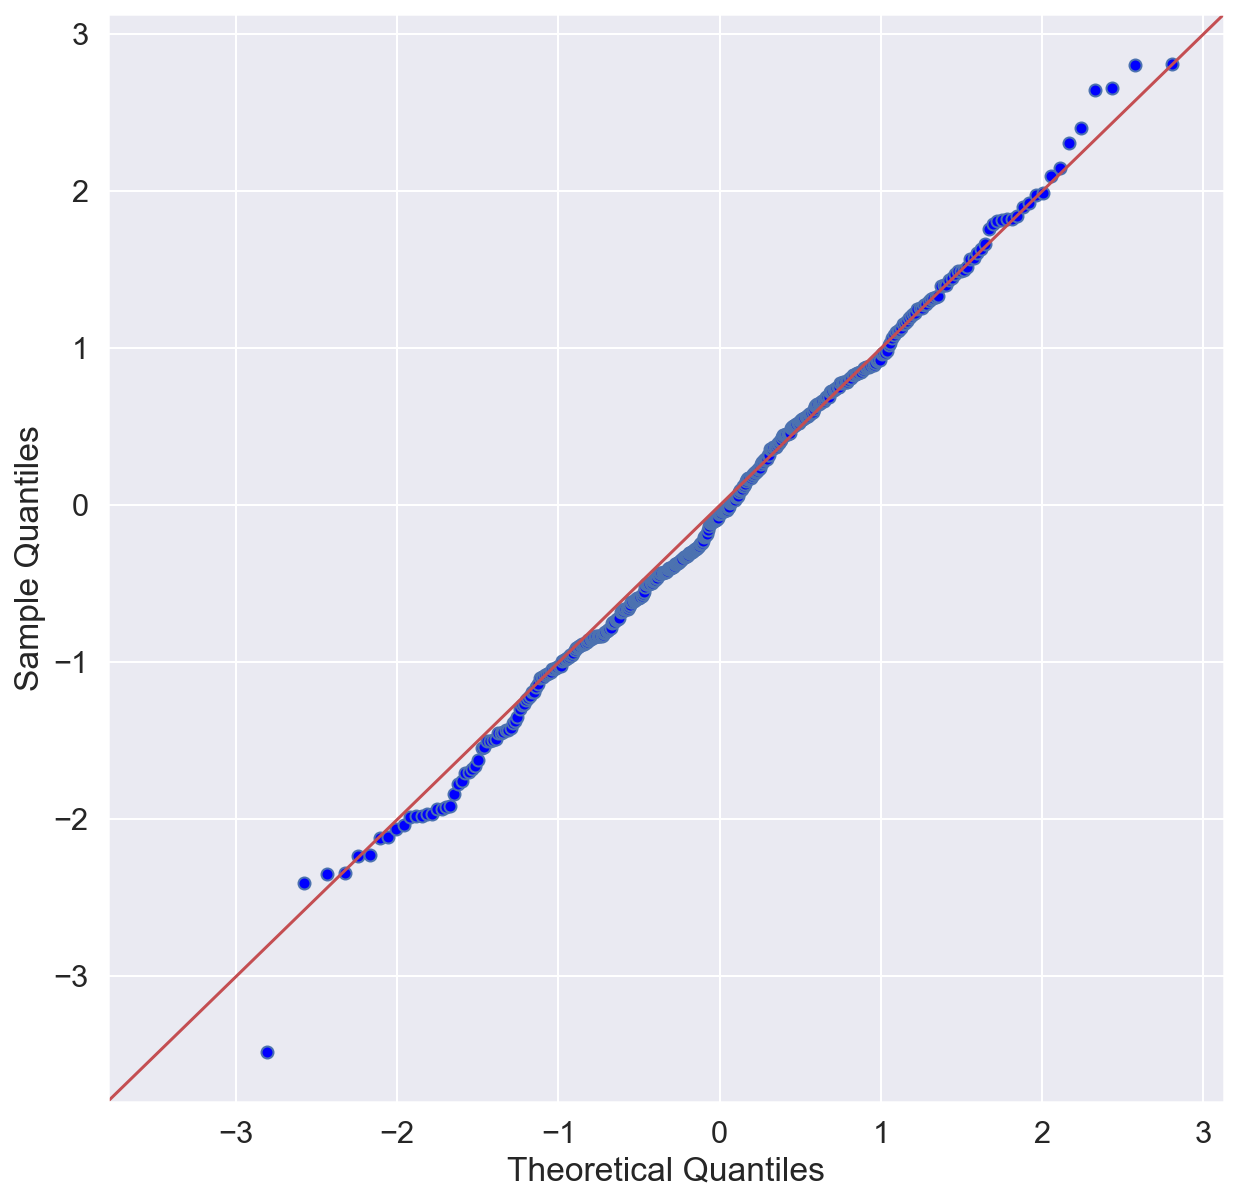

In [18]:
import statsmodels.api as sm

theta_norm = np.sqrt(N)*(est_1-1)/np.sqrt(1/3)

fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
plt.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** Да, выборка взята из номального распределения, так как квантили почти совпадают.

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** Лучше всего подходит экспоненциальное распределение, так как квантили максимально совпадают.

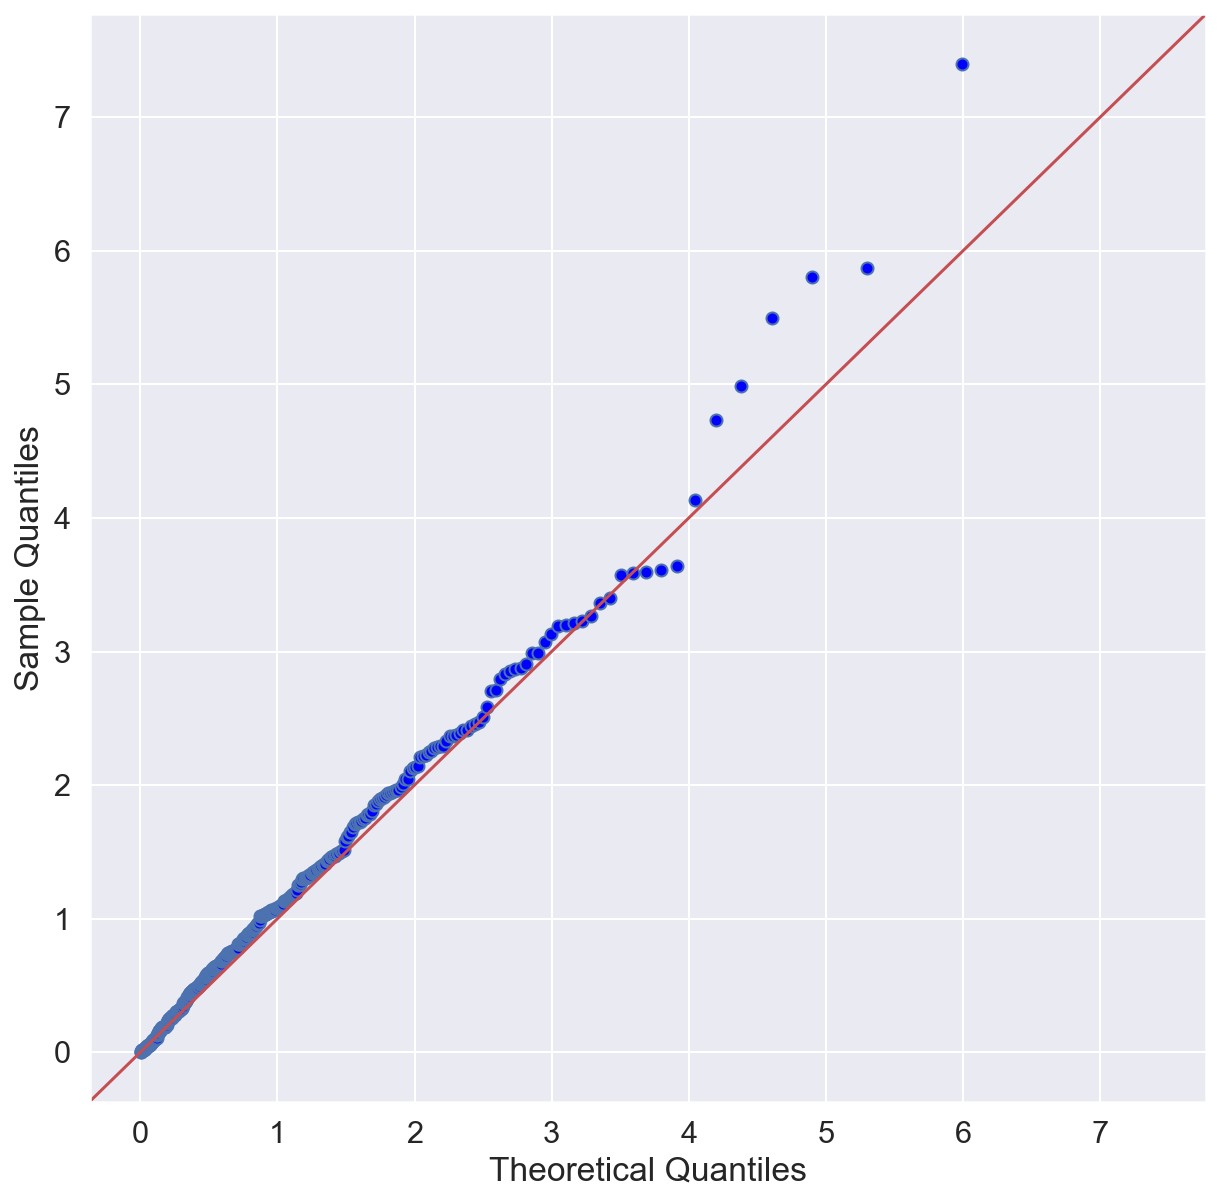

In [19]:
import statsmodels.api as sm

theta_norm = (1 - N*(est_2 - 1))

fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax, dist=sps.expon)
plt.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:** Кажется, что не ассимптотически нормальная оценка $\theta^*$ лучше, чем $\hat\theta$, потому что она сходится быстрее  благодаря домножению на N, а не на $\sqrt{N}$.

## Важно

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.